In [39]:
import os
import glob
import numpy as np
import awkward

In [40]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt

In [41]:
# import matplotlib
# %matplotlib inline
# import matplotlib.pyplot as plt

In [42]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [43]:
# taken from the training outputs -- update if needed
#presel_eff = {0: 0.0531643892564612, 1: 0.9818927295320153, 10: 0.9940605634291205, 100: 0.9957324620030694, 1000: 0.9973451587037725}
# Latest:
presel_eff = {1: 0.9462915132531003, 10: 0.9870015349946112, 100: 0.9933834048640916, 1000: 0.997, 0: 0.025127295226218364}

In [44]:
#sig_filelist = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v12_background_12M/*map*.parquet')
# looking at double instead of 12M
sig_filelist = ['/home/dgj1118/LDMX-scripts/GraphNet/plot_data/v12_PN_training/output_OUTPUT.parquet']
#bkg_filelist = glob.glob('/home/pmasterson/ParticleNet/LDMX-scripts/GraphNet/plot_data/v12_large_full/*.parquet')
# train on kaon, eval on 300k bkg:  v12_large_full_kaon
# train on ~100k bkg:  plot_data/v12_large_full/ (too small!)
bkg_filelist = glob.glob('/home/dgj1118/LDMX-scripts/GraphNet/plot_data/v12_large_PN_bkg2/output/*.parquet')


In [45]:
#sig_tables = [awkward.load(f) for f in sig_filelist]
#bkg_tables = [awkward.load(f) for f in bkg_filelist]
sig_tables = [awkward.from_parquet(f) for f in sig_filelist]
bkg_tables = [awkward.from_parquet(f) for f in bkg_filelist]
print("Loaded")
print("sig_tables:")
print(awkward.type(sig_tables[0]))
print("bkg_tables:")
print(awkward.type(bkg_tables[0]))

"""# Plot discValue distr, just to check...
bins = np.linspace(0.996, 0.998, 100)
plt.figure()
plt.hist(bkg_tables[0]['EcalVeto_v12.discValue_'], bins=bins, density=True, histtype='step')
plt.xlim((0.996,0.998))
plt.semilogy()
plt.show()
print(bkg_tables[0]['EcalVeto_v12.discValue_'])"""

Loaded
sig_tables:
12659 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_extra_label": int32, "ParticleNet_disc": float64}
bkg_tables:
563 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_disc": float64}


"# Plot discValue distr, just to check...\nbins = np.linspace(0.996, 0.998, 100)\nplt.figure()\nplt.hist(bkg_tables[0]['EcalVeto_v12.discValue_'], bins=bins, density=True, histtype='step')\nplt.xlim((0.996,0.998))\nplt.semilogy()\nplt.show()\nprint(bkg_tables[0]['EcalVeto_v12.discValue_'])"

In [46]:
load_branches = [
    'EcalVeto_v12.discValue_',
    'EcalVeto_v12.recoilX_',
    'EcalVeto_v12.recoilY_',
    
    'ParticleNet_extra_label',
    'ParticleNet_disc',
    'TargetSPRecoilE_pt', # use this for plotting: this is the recoil electron pT at TargetSP
]

In [47]:
a = {}
for k in load_branches:
    print("Loading "+k)
    arrs = []
    for tab in sig_tables + bkg_tables:
        print(awkward.type(tab))
        #print(awkward.fields(tab))
        arr = tab[k] if k in awkward.fields(tab) else np.zeros_like(tab['ParticleNet_disc'])
        arrs.append(arr)
    a[k] = awkward.concatenate(arrs)
    if k.startswith('EcalVeto'):
        #a[k] = a[k].regular()
        a[k] = awkward.to_regular(a[k])
        if a[k].ndim==2 and len(a[k][0]) == 1:  #a[k].shape[1]==1:
            a[k] = a[k][:,0]
    print("   Found {} events".format(len(a[k])))

#t_extra_labels = a['ParticleNet_extra_label']
#print("TESTING")
#print(a['TargetSPRecoilE_pt'][:100])
#print("DONE")
"""p_rec = a['EcalVeto_v12.recoilX_']
#NEW for finding frac of missing-e events
for k in presel_eff:  #Find the fraction of missing-e events for each signal category
    n_events=0
    n_missing_e=0
    for i in range(len(p_rec)):
        if t_extra_labels[i] == k:
            n_events += 1
            #if i<100:  print(p_rec[i])
            if p_rec[i] == -9999:  n_missing_e += 1
    print("Found", n_events, "events for", k, "MeV")
    print("Fraction of events w/ missing electron for "+str(k)+" MeV is ", str(n_missing_e/n_events))"""
print("Done")


Loading EcalVeto_v12.discValue_
12659 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_extra_label": int32, "ParticleNet_disc": float64}
563 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_disc": float64}
509 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_disc": float64}
553 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_v12.recoilX_": float32, "EcalVeto_v12.recoilY_": float32, "EcalVeto_v12.summedTightIso_": float32, "ParticleNet_disc": float64}
526 * {"TargetSPRecoilE_pt": float64, "EcalVeto_v12.discValue_": float32, "EcalVeto_

   Found 17365 events
Done


In [48]:
#NEW:  Remove all hits with/without recoilX_==-999 (or -9999?) (or Y)
ntotal = len(a['EcalVeto_v12.recoilX_'])
mask = a['EcalVeto_v12.recoilX_'] != -9999
for k in load_branches:
    a[k] = a[k][mask]
print("Fraction of events without missing electron:", (ntotal-len(a[load_branches[0]]))/len(mask))

#Examine missing electrons in each category:
#NOTE:  uncertain how bkg_tables, etc are structured...
#print(sig_tables[0])

Fraction of events without missing electron: 0.09450043190325368


In [49]:
for k in a.keys():
    print(k, awkward.type(a[k]))
    #NOTE:  elements of dict are just np arrays
    #So...it should be possible to sift everything accordingly.
    
# Full size:  3395546
# Ehit size:  2789329
# Missing e size:  606217 -> Sizes are all consistent

EcalVeto_v12.discValue_ 15724 * float32
EcalVeto_v12.recoilX_ 15724 * float32
EcalVeto_v12.recoilY_ 15724 * float32
ParticleNet_extra_label 15724 * float64
ParticleNet_disc 15724 * float64
TargetSPRecoilE_pt 15724 * float64


In [50]:
def to_categorical(y, num_classes=None):
    """Converts a class vector (integers) to binary class matrix.
    E.g. for use with categorical_crossentropy.
    # Arguments
        y: class vector to be converted into a matrix
            (integers from 0 to num_classes).
        num_classes: total number of classes.
    # Returns
        A binary matrix representation of the input.
    """
    y = np.array(y, dtype='int').ravel()
    if not num_classes:
        num_classes = np.max(y) + 1
    n = y.shape[0]
    categorical = np.zeros((n, num_classes), dtype='int')
    categorical[np.arange(n), y] = 1
    return categorical


def plotROC(y_preds, y_truth, sample_weight=None, output=None, labels=['signal'], sig_eff=1, bkg_eff=1, energy=0, **kwargs):
    from sklearn.metrics import auc, roc_curve, accuracy_score

    fpr = dict()
    tpr = dict()
    thresholds= dict()
    roc_auc = dict()
    outputs = {}

    plt.figure()

    for label, pred in zip(labels, y_preds):
        print("ytruthlen =", len(y_truth))
        print("predlen =", len(pred))
        print("len sample_weight =", len(sample_weight))
        fpr[label], tpr[label], thresholds[label] = roc_curve(y_truth, pred, sample_weight=sample_weight)
        roc_auc[label] = auc(fpr[label], tpr[label])
        print("**Plotting", len(fpr[label]), "points")
        fpr[label] *= bkg_eff
        tpr[label] *= sig_eff

        legend = '%s (auc* = %0.6f)' % (label, roc_auc[label])
        print(legend)
        eff = get_signal_effs(fpr[label], tpr[label], thresholds[label])
        outputs[label] = eff
        print(eff)
        print("**Plotting", len(fpr[label]), "events")
        plt.plot(fpr[label], tpr[label], label=legend)
#     plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim(kwargs.get('xlim', [0, 1]))
    plt.ylim(kwargs.get('ylim', [0, 1]))
    plt.xlabel('False positive rate ($\epsilon_{B}$)')
    plt.ylabel('True positive rate ($\epsilon_{S}$)')
#     plt.title('Receiver operating characteristic example')
    plt.legend(loc='best')
    if kwargs.get('logy', False):
        plt.yscale('log')
    if kwargs.get('logx', False):
        plt.xscale('log')
    plt.grid()
    # TEMPORARY TITLE
    plt.title(str(k)+" MeV", fontdict = {'fontsize' : 15})
    #plt.title("All events, "+str(k)+" MeV", fontdict = {'fontsize' : 15})
    if output:
        plt.savefig(output)
#     return {'fpr':fpr, 'tpr':tpr, 'thresholds':thresholds}
    return outputs

mistags=[1e-3, 1e-4, 1e-5, 1e-6]
def get_signal_effs(fpr, tpr, thresholds, mistags=mistags):
    outputs = []
    for m in mistags:
        idx = next(idx for idx, v in enumerate(fpr) if v > m)
        outputs.append((fpr[idx], tpr[idx], thresholds[idx]))
    return outputs


In [51]:
test_extra_labels = a['ParticleNet_extra_label']
test_labels = test_extra_labels>0

"""temp = a['ParticleNet_disc']
temp_ = a['EcalVeto_v12.discValue_']
print(temp[:10])
print(temp_[:10])

bins = np.linspace(0, 1.0, 100)

PN = []
EV = []
for i in range(len(temp_)):
    if test_extra_labels[i] == 1:  # 0, or 10, or...
        #print(temp[i])
        PN.append(temp[i])
        EV.append(temp_[i])
        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:
        #    print("LESS")
        #    print(temp[i])
        #if temp[i] == 1.0:  print(1)
plt.figure()
plt.hist(PN, bins=bins, histtype='step', color='b')
plt.hist(EV, bins=bins, histtype='step', color='r')
plt.semilogy()
plt.show()"""

'temp = a[\'ParticleNet_disc\']\ntemp_ = a[\'EcalVeto_v12.discValue_\']\nprint(temp[:10])\nprint(temp_[:10])\n\nbins = np.linspace(0, 1.0, 100)\n\nPN = []\nEV = []\nfor i in range(len(temp_)):\n    if test_extra_labels[i] == 1:  # 0, or 10, or...\n        #print(temp[i])\n        PN.append(temp[i])\n        EV.append(temp_[i])\n        #if temp_[i] > 1.0 - 1e-6 and temp_[i] < 1.0:\n        #    print("LESS")\n        #    print(temp[i])\n        #if temp[i] == 1.0:  print(1)\nplt.figure()\nplt.hist(PN, bins=bins, histtype=\'step\', color=\'b\')\nplt.hist(EV, bins=bins, histtype=\'step\', color=\'r\')\nplt.semilogy()\nplt.show()'

1 MeV


<IPython.core.display.Javascript object>


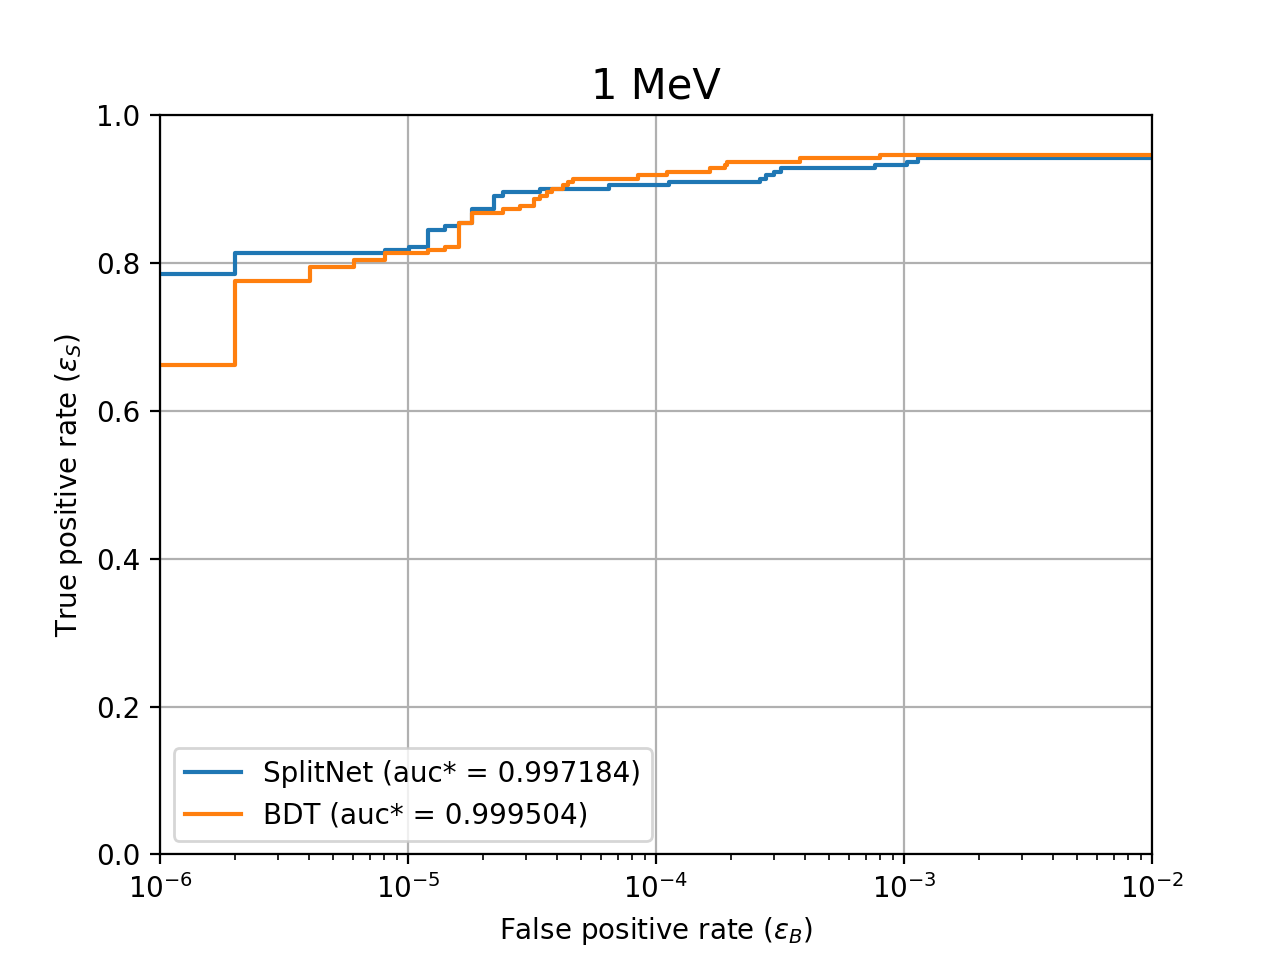

ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 424 points
SplitNet (auc* = 0.997184)
[(0.0010261787768554905, 0.9325105688853368, 0.02911522325206162), (0.00011267845392923033, 0.9049486801498096, 0.2212353277364789), (1.006057624368128e-05, 0.8176693658206401, 0.8103511630667845), (2.012115248736256e-06, 0.785513828962525, 0.8808291128145082)]
**Plotting 424 events
ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 892 points
BDT (auc* = 0.999504)
[(0.0010000212786219192, 0.9462915132531003, 8.702278e-05), (0.00011066633868049408, 0.9187296245175731, 0.0014287233), (1.006057624368128e-05, 0.8130757176980522, 0.022665203), (2.012115248736256e-06, 0.6614853296526527, 0.53065294)]
**Plotting 892 events
10 MeV


<IPython.core.display.Javascript object>


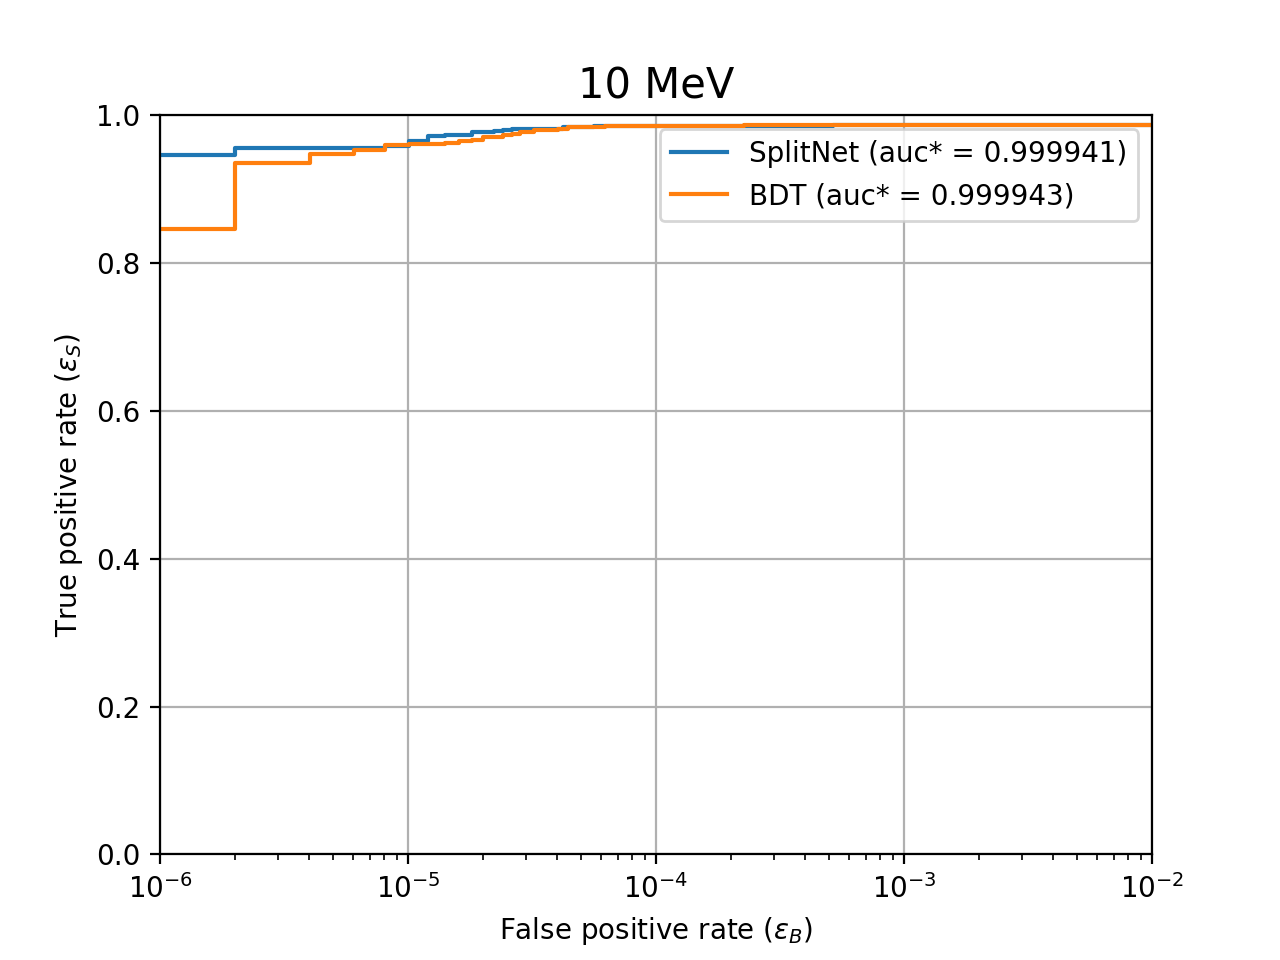

ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 981 points
SplitNet (auc* = 0.999941)
[(0.0010261787768554905, 0.9870015349946112, 0.02911522325206162), (0.00011267845392923033, 0.985285010585925, 0.2212353277364789), (1.006057624368128e-05, 0.9578206200469445, 0.8103511630667845), (2.012115248736256e-06, 0.9458049491861404, 0.8808291128145082)]
**Plotting 981 events
ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 1474 points
BDT (auc* = 0.999943)
[(0.0010000212786219192, 0.9870015349946112, 8.702278e-05), (0.00011066633868049408, 0.985285010585925, 0.0014287233), (1.006057624368128e-05, 0.9595371444556307, 0.022665203), (2.012115248736256e-06, 0.8462465334823361, 0.53065294)]
**Plotting 1474 events
100 MeV


<IPython.core.display.Javascript object>


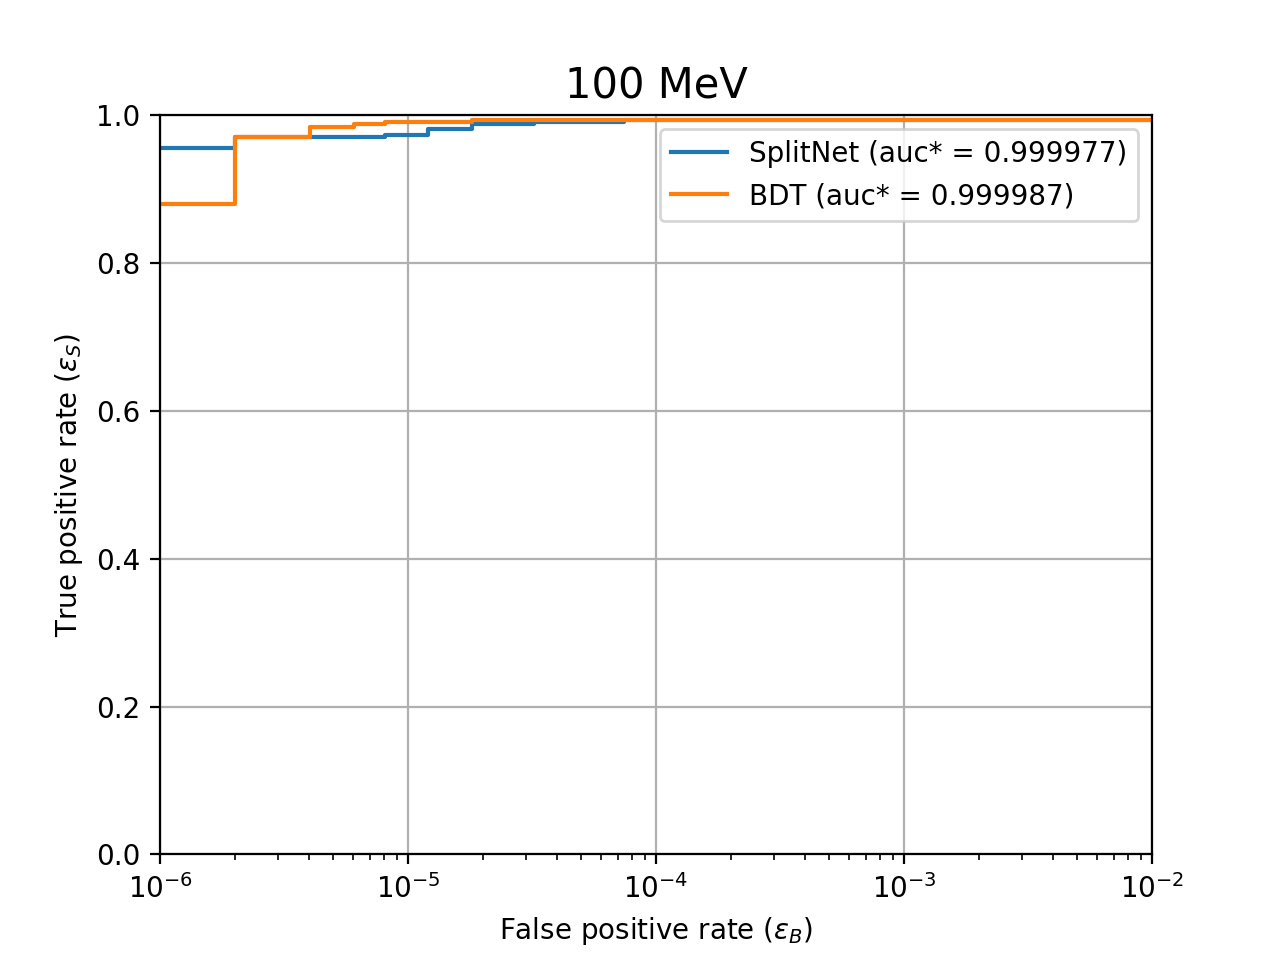

ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 669 points
SplitNet (auc* = 0.999977)
[(0.0010261787768554905, 0.9933834048640916, 0.02911522325206162), (0.00011267845392923033, 0.9933834048640916, 0.2212353277364789), (1.006057624368128e-05, 0.9731102741525796, 0.8103511630667845), (2.012115248736256e-06, 0.9557333049712835, 0.8808291128145082)]
**Plotting 669 events
ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 1160 points
BDT (auc* = 0.999987)
[(0.0010000212786219192, 0.9933834048640916, 8.702278e-05), (0.00011066633868049408, 0.9933834048640916, 0.0014287233), (1.006057624368128e-05, 0.9904872433338756, 0.022665203), (2.012115248736256e-06, 0.8804331051856672, 0.53065294)]
**Plotting 1160 events
1000 MeV


<IPython.core.display.Javascript object>


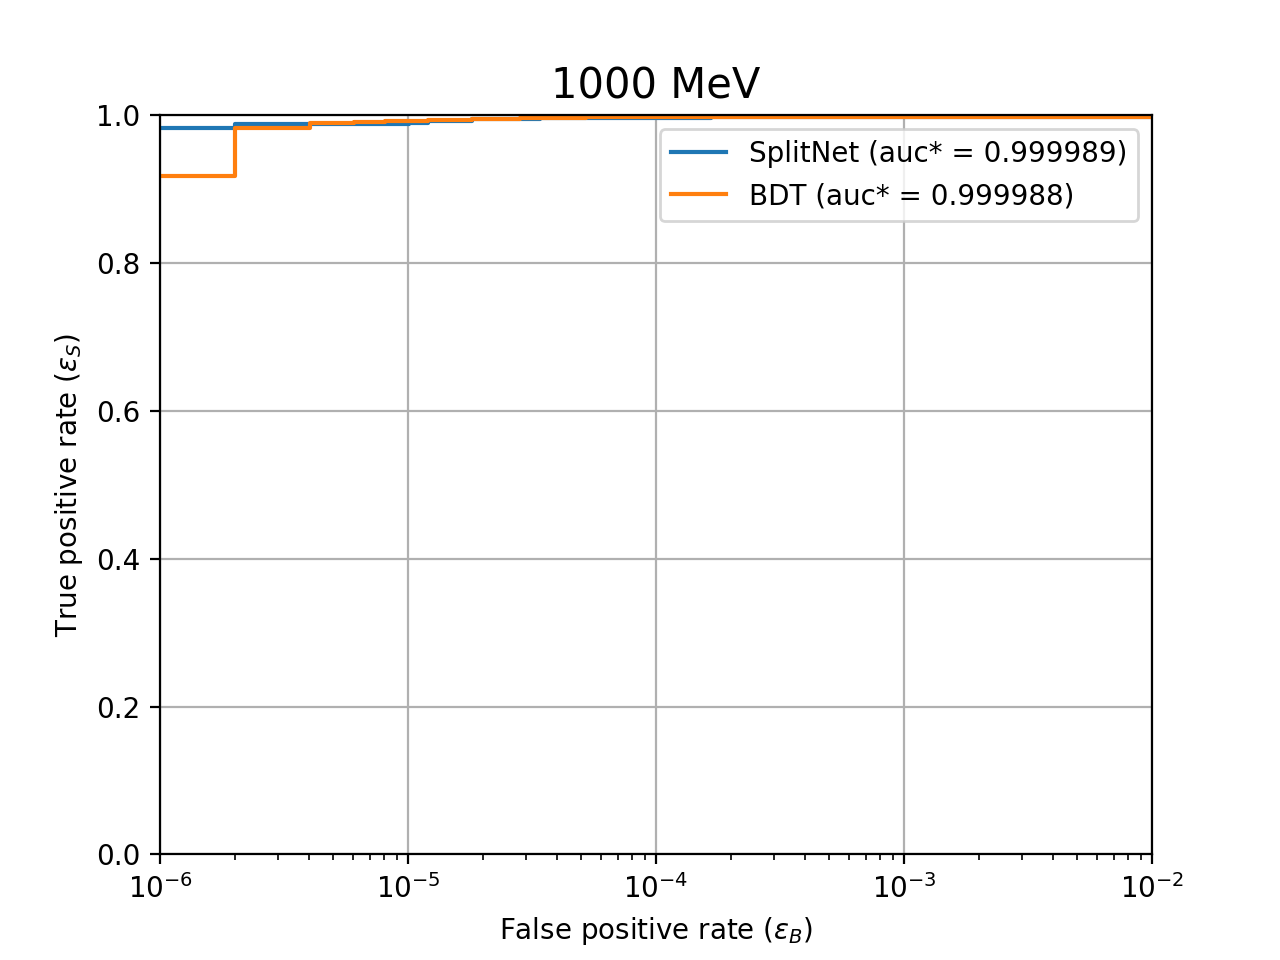

ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 1476 points
SplitNet (auc* = 0.999989)
[(0.0010261787768554905, 0.997, 0.02911522325206162), (0.00011267845392923033, 0.9965279356060606, 0.2212353277364789), (1.006057624368128e-05, 0.9885028409090909, 0.8103511630667845), (2.012115248736256e-06, 0.9828380681818182, 0.8808291128145082)]
**Plotting 1476 events
ytruthlen = 15724
predlen = 15724
len sample_weight = 15724
**Plotting 1966 points
BDT (auc* = 0.999988)
[(0.0010000212786219192, 0.997, 8.702278e-05), (0.00011066633868049408, 0.997, 0.0014287233), (1.006057624368128e-05, 0.9927514204545455, 0.022665203), (2.012115248736256e-06, 0.9176931818181818, 0.53065294)]
**Plotting 1966 events


In [52]:
roc_info = {}
for k in presel_eff:
    if k > 0:
        mass = '%d MeV' % k
        print(mass)
        roc_info[k] = plotROC([a['ParticleNet_disc'], a['EcalVeto_v12.discValue_']], test_labels, 
                sample_weight=np.logical_or(test_extra_labels == 0, test_extra_labels == k),
                sig_eff=presel_eff[k], bkg_eff=presel_eff[0],
                labels=['SplitNet', 'BDT'], xlim=[1e-6, .01], ylim=[0, 1], logx=True, energy=k)
        #**NOTE:**  The sample_weight line is critical!!  Selects only bkg+sig[k].

In [53]:
roc_info

{1: {'SplitNet': [(0.0010261787768554905,
    0.9325105688853368,
    0.02911522325206162),
   (0.00011267845392923033, 0.9049486801498096, 0.2212353277364789),
   (1.006057624368128e-05, 0.8176693658206401, 0.8103511630667845),
   (2.012115248736256e-06, 0.785513828962525, 0.8808291128145082)],
  'BDT': [(0.0010000212786219192, 0.9462915132531003, 8.702278e-05),
   (0.00011066633868049408, 0.9187296245175731, 0.0014287233),
   (1.006057624368128e-05, 0.8130757176980522, 0.022665203),
   (2.012115248736256e-06, 0.6614853296526527, 0.53065294)]},
 10: {'SplitNet': [(0.0010261787768554905,
    0.9870015349946112,
    0.02911522325206162),
   (0.00011267845392923033, 0.985285010585925, 0.2212353277364789),
   (1.006057624368128e-05, 0.9578206200469445, 0.8103511630667845),
   (2.012115248736256e-06, 0.9458049491861404, 0.8808291128145082)],
  'BDT': [(0.0010000212786219192, 0.9870015349946112, 8.702278e-05),
   (0.00011066633868049408, 0.985285010585925, 0.0014287233),
   (1.0060576243681

In [54]:
plot_bins = {
#     'EcalVetoGabriel_recon.nReadoutHits_':np.linspace(0, 50, 51),
#     'EcalVetoGabriel_recon.deepestLayerHit_':np.linspace(0, 35, 36),
#     'EcalVetoGabriel_recon.summedDet_':np.linspace(0, 2000, 41),
#     'EcalVetoGabriel_recon.summedTightIso_':np.linspace(0, 400, 41),
#     'EcalVetoGabriel_recon.maxCellDep_':np.linspace(0, 400, 41),
#     'EcalVetoGabriel_recon.showerRMS_':np.linspace(0, 250, 26),
#     'EcalVetoGabriel_recon.xStd_':np.linspace(0, 200, 41),
#     'EcalVetoGabriel_recon.yStd_':np.linspace(0, 200, 41),
#     'EcalVetoGabriel_recon.avgLayerHit_':np.linspace(0, 35, 36),
#     'EcalVetoGabriel_recon.stdLayerHit_':np.linspace(0, 20, 21),
#     'EcalVetoGabriel_recon.ecalBackEnergy_':np.linspace(0, 200, 41),
# #     'EcalVetoGabriel_recon.discValue_':np.linspace(0.9, 1, 51),
#     'EcalVetoGabriel_recon.recoilX_':np.linspace(-400, 400, 81),
#     'EcalVetoGabriel_recon.recoilY_':np.linspace(-400, 400, 81),

    'TargetSPRecoilE_pt':np.linspace(-50, 200, 51),

#     'ParticleNet_disc':np.linspace(0, 1, 51),
}

# plot_bins = {
#     'EcalVetoGabriel_recon.ecalLayerEdepReadout_:%d'%i:np.linspace(0, 1000, 51) for i in range(34)
# }


In [55]:
colors = ['#636363', '#74c476', '#3182bd', '#f03b20', '#bd0026']
colors = None

In [56]:
def plot_sig_vs_bkg(var_name):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None

    arrays = []
    labels = []
    for proc in presel_eff.keys():
        pos = test_extra_labels==proc
        arr = a[var][pos]
        # NEW:  See if direct awkward conversion works
        arr = np.array(arr)
        if var_idx:
            arr = arr[:, var_idx]
        if not isinstance(plot_bins[var_name], int):
            arr = np.clip(arr, min(plot_bins[var_name]), max(plot_bins[var_name]))
        arrays.append(arr)
        labels.append('BKG' if proc==0 else '%d MeV'%proc)
    f = plt.figure()
    #TEMP TITLE
    #plt.title("Events without SP hit")
    plt.title("All events")
    #NOTE:  normed=True caused an error; removing it temporarily
    plt.hist(arrays, bins=plot_bins[var_name], label=labels, histtype='step', log=True)
    plt.legend()
    plt.xlabel(var_name)

In [57]:
# plot_sig_vs_bkg('TargetSPRecoilE_pt')

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


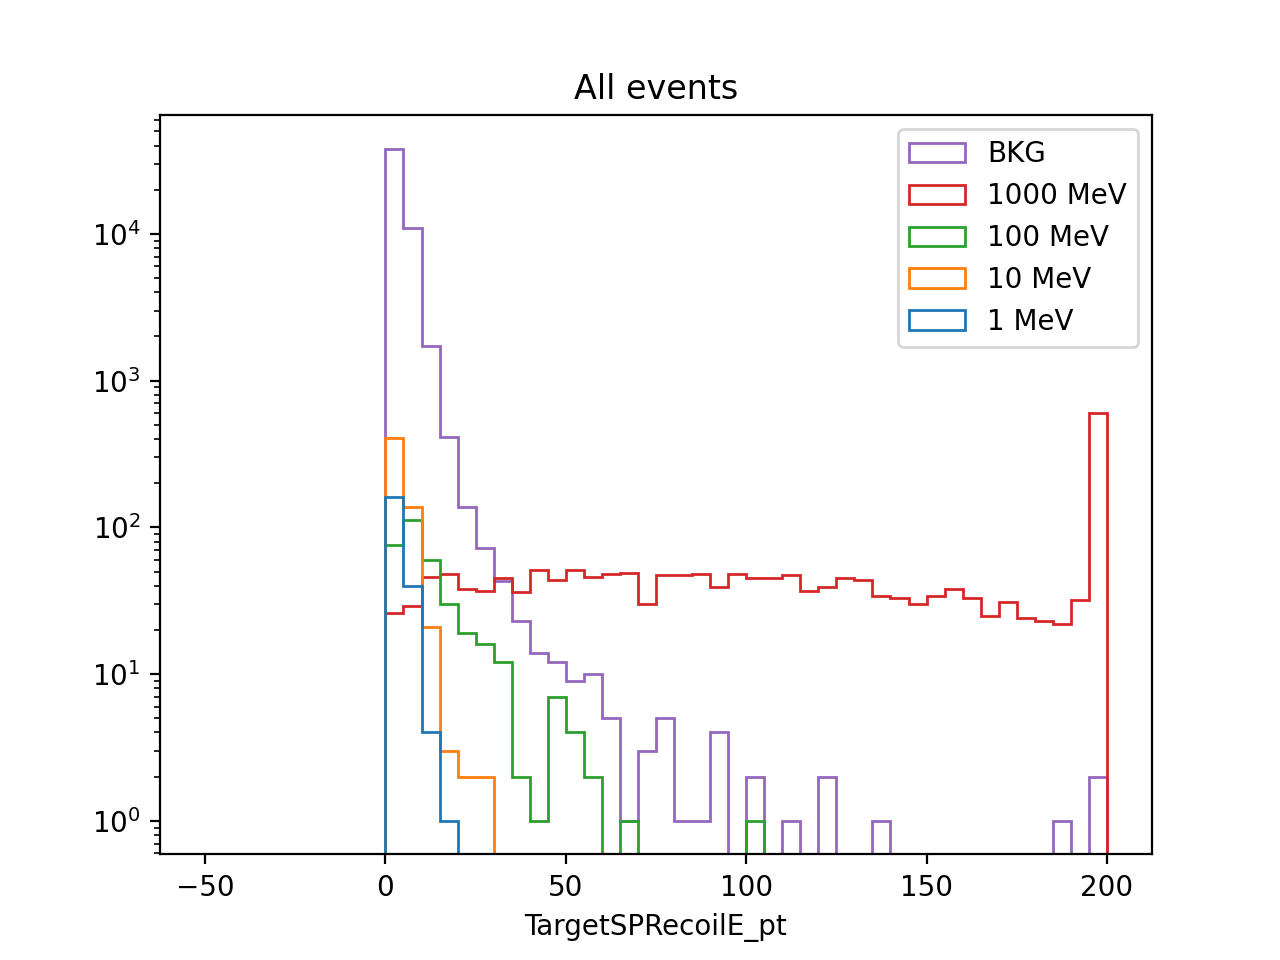

In [20]:
for var in plot_bins:
    print(var)
    plot_sig_vs_bkg(var)

In [21]:
def plot_trend(var_name, proc, eff_levels=None, mistag_levels=[1e-3, 1e-4, 1e-5, 1e-6]):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None
    if eff_levels is None and mistag_levels is None:
        eff_levels = [1e-3, 1e-4, 1e-5, 1e-6] if proc==0 else [0.9, 0.7, 0.5, 0.2]
    f, axes = plt.subplots(1, 2, figsize=(12, 5))
    f.suptitle('%d MeV'%proc if proc>0 else 'BKG', fontsize=16)
    pos0 = test_extra_labels==proc
    #a_tmp = {k:a[k][pos0] for k in ('ParticleNet_disc', 'EcalVetoGabriel_recon.discValue_', var)}
    # TESTING CONVERSION:
    a_tmp = {k:np.array(a[k][pos0]) for k in ('ParticleNet_disc', 'EcalVeto_v12.discValue_', var)}
    if var_idx:
        a_tmp[var] = a_tmp[var][:, var_idx]
    # NEW:  Ratio plot testing
    ratio_arrs = []  # PN_disc, ECal.disc
    for i, k in enumerate(['ParticleNet_disc', 'EcalVeto_v12.discValue_']):
        arrs = []
        labels = []
        scores = a_tmp[k]
        if mistag_levels is None:  #NOTE:  Currently modifying this to produce fixed bkg efficiencies...
            #Changing presel_eff[proc] to 1 (Warning:  bkg will be messed up)
            pcts = (1 - np.array(eff_levels)/presel_eff[1]) * 100.
            print('effs=', pcts)
            thresholds = [-99] + list(np.percentile(scores, pcts))
        else:
            thresholds = [-99] + [info[-1] for info in roc_info[1]['SplitNet' if i==0 else 'BDT']]
        print(k, thresholds)
        for idx, thres in enumerate(thresholds):
            pos = scores>thres
#             print(k, thres, pos.sum())
            if not isinstance(plot_bins[var_name], int):
                arrs.append(np.clip(a_tmp[var][pos], min(plot_bins[var_name]), max(plot_bins[var_name])))
            else:
                arrs.append(a_tmp[var][pos])
            if mistag_levels is None:
                labels.append('inclusive' if idx==0 else ('$\epsilon_{B}$=%.0e'%eff_levels[idx-1] if proc==0 else '$\epsilon_{S}$=%.1f'%eff_levels[idx-1]))
            else:
                labels.append('inclusive' if idx==0 else '$\epsilon_{B}$=%.0e'%mistag_levels[idx-1])

        axes[i].hist(arrs, histtype='step', bins=plot_bins[var_name], density=True, log=True, label=labels, color=colors, linewidth=2)
        axes[i].set_title('ParticleNet' if i==0 else 'BDT')  #, '+str(proc if proc>0 else 'BKG')+' MeV
        axes[i].set_xlabel(var)
        axes[i].set_ylim(1e-6, 30)
        axes[i].legend(loc='best')
        
        ratio_arrs.append(arrs)
    """print(len(ratio_arrs))
    print(len(ratio_arrs[0]))
    print(len(ratio_arrs[0][0]))
    plot_histos_PN = [np.histogram(a, plot_bins[var_name]) for a in ratio_arrs[0]]
    plot_histos_EV = [np.histogram(a, plot_bins[var_name]) for a in ratio_arrs[1]]
    print(len(plot_histos_PN), len(plot_histos_PN[0]))
    print(plot_bins[var_name])
    print(np.histogram(ratio_arrs[0], bins=plot_bins[var_name]))
    plot_histo_ratios = [[a / b for a, b in zip(ah, bh)] for ah, bh in zip(plot_histos_PN, plot_histos_EV)]
    plt_bins_ = [plot_bins[var_name][p] for p in range(len(plot_bins[var_name]-1))]
    plot_bins_ = [plt_bins_ for i in range(len(plot_histos_PN))]
    plt.figure(figsize=(6, 3))
    plt.title('Ratio of PN pT / BDT pT')
    plt.plot(plot_bins_, plot_histo_ratios, label=labels)
    plt.legend(loc='best')
    plt.show()"""

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


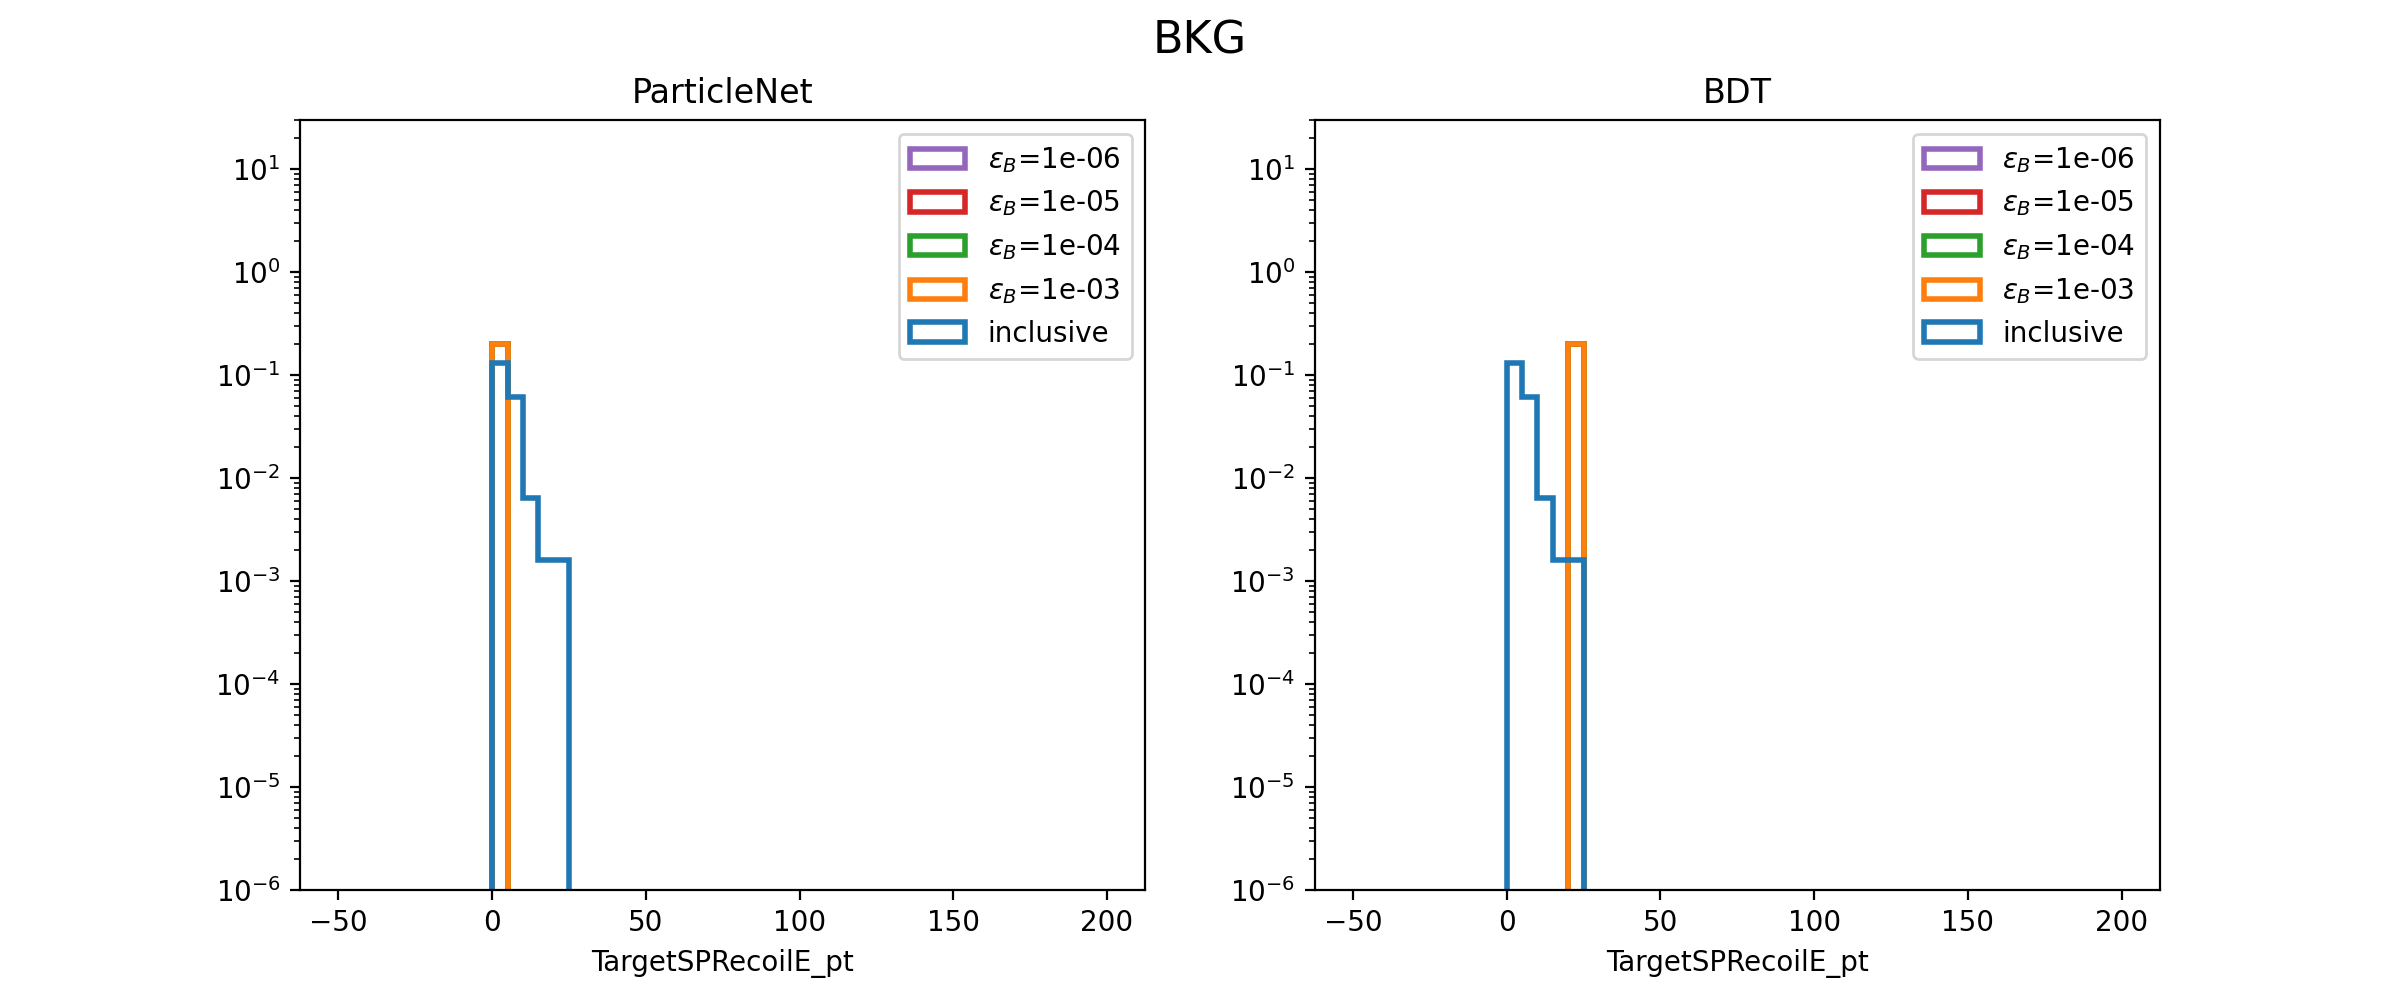

effs= [99.89432432 99.98943243 99.99894324 99.99989432]
ParticleNet_disc [-99, 0.8918099269779325, 0.8939816338665615, 0.8941988045554247, 0.894220521624311]
effs= [99.89432432 99.98943243 99.99894324 99.99989432]
EcalVeto_v12.discValue_ [-99, 0.07177323070270071, 0.07641398903439661, 0.07687806486756692, 0.07692447245088373]


<IPython.core.display.Javascript object>


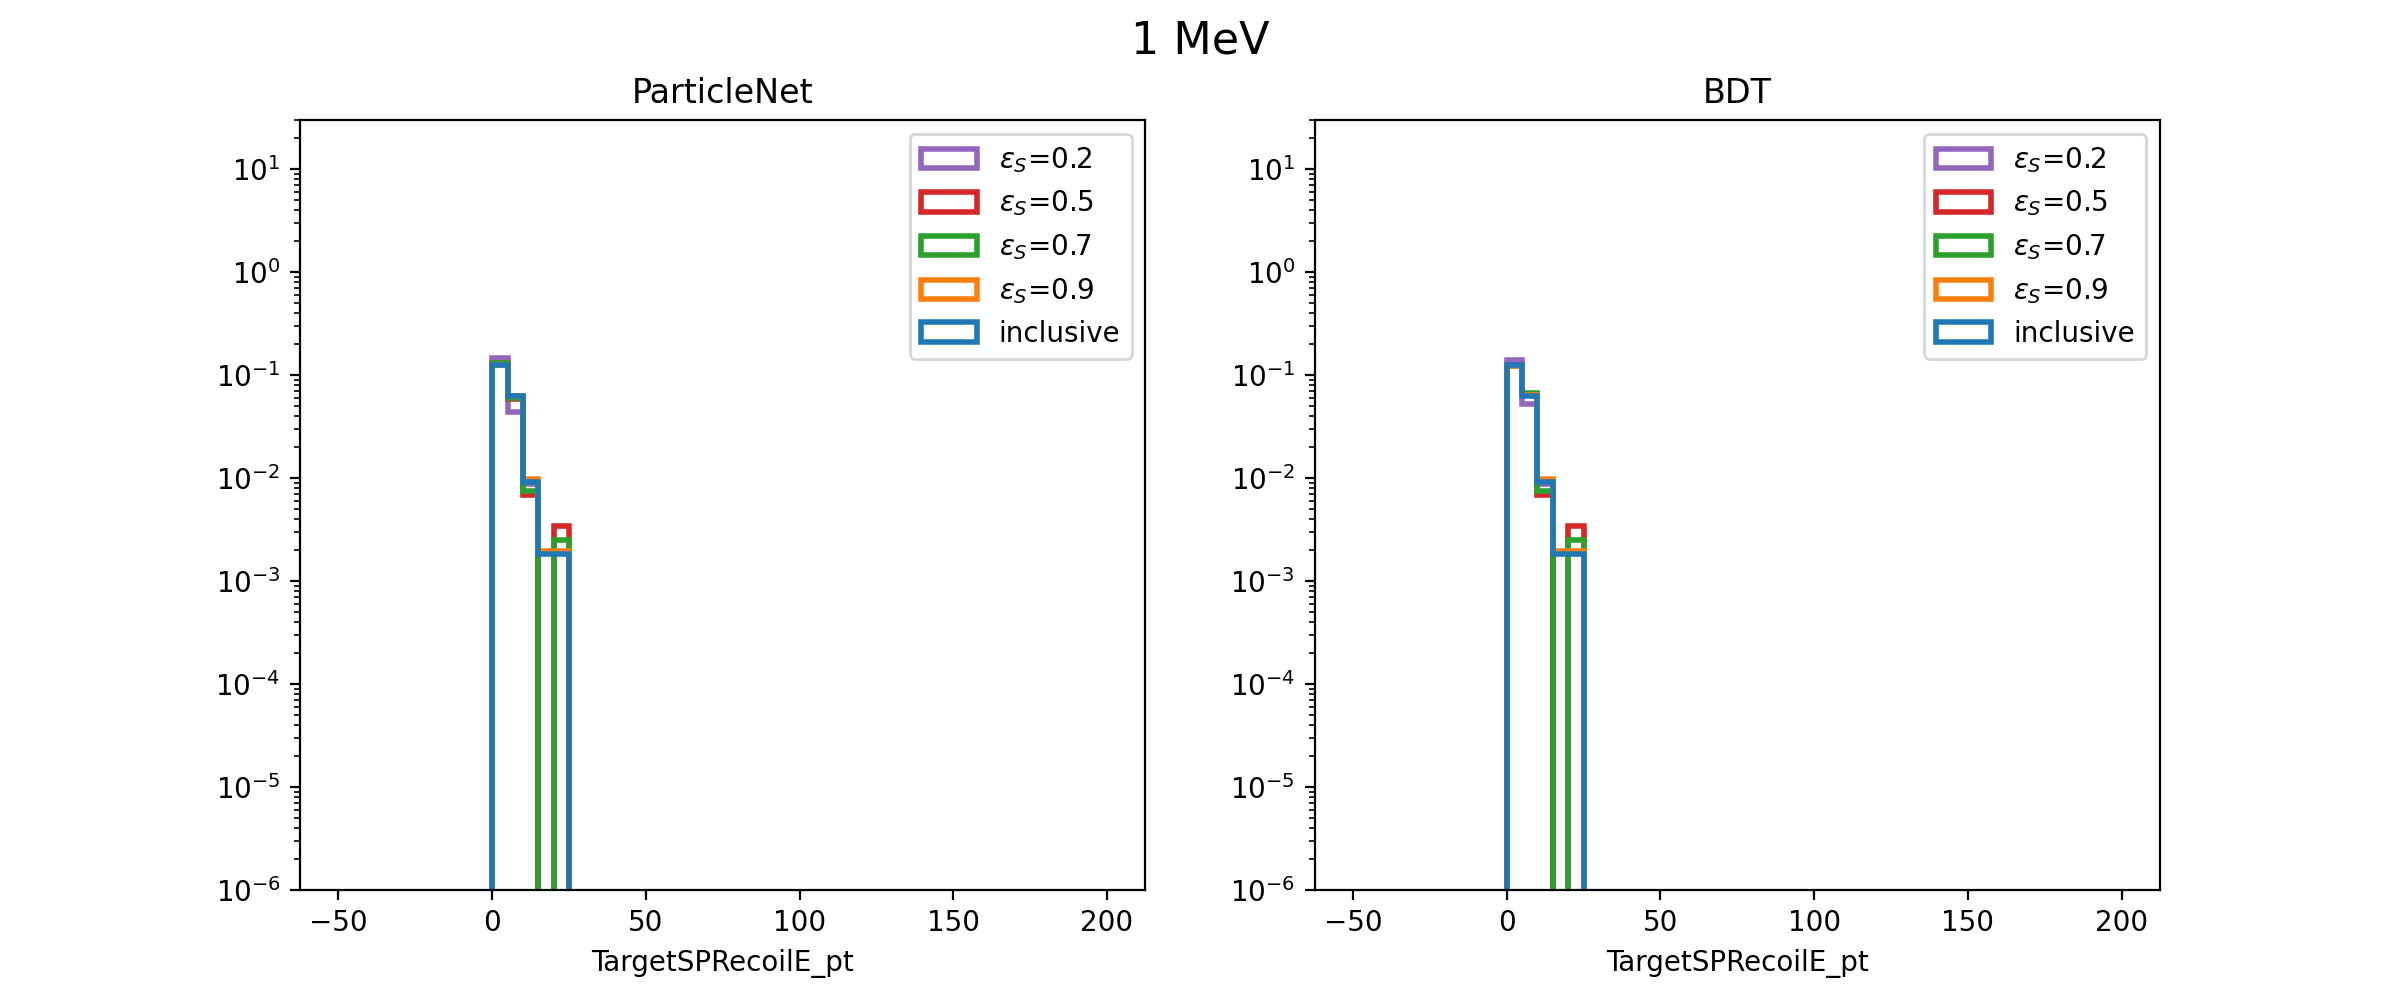

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.752421799707267, 0.8625882660527501, 0.9177555913774147, 0.9659206910431051]
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0003925062363085753, 0.002150156342237199, 0.011920322954715852, 0.2862076864341966]


<IPython.core.display.Javascript object>


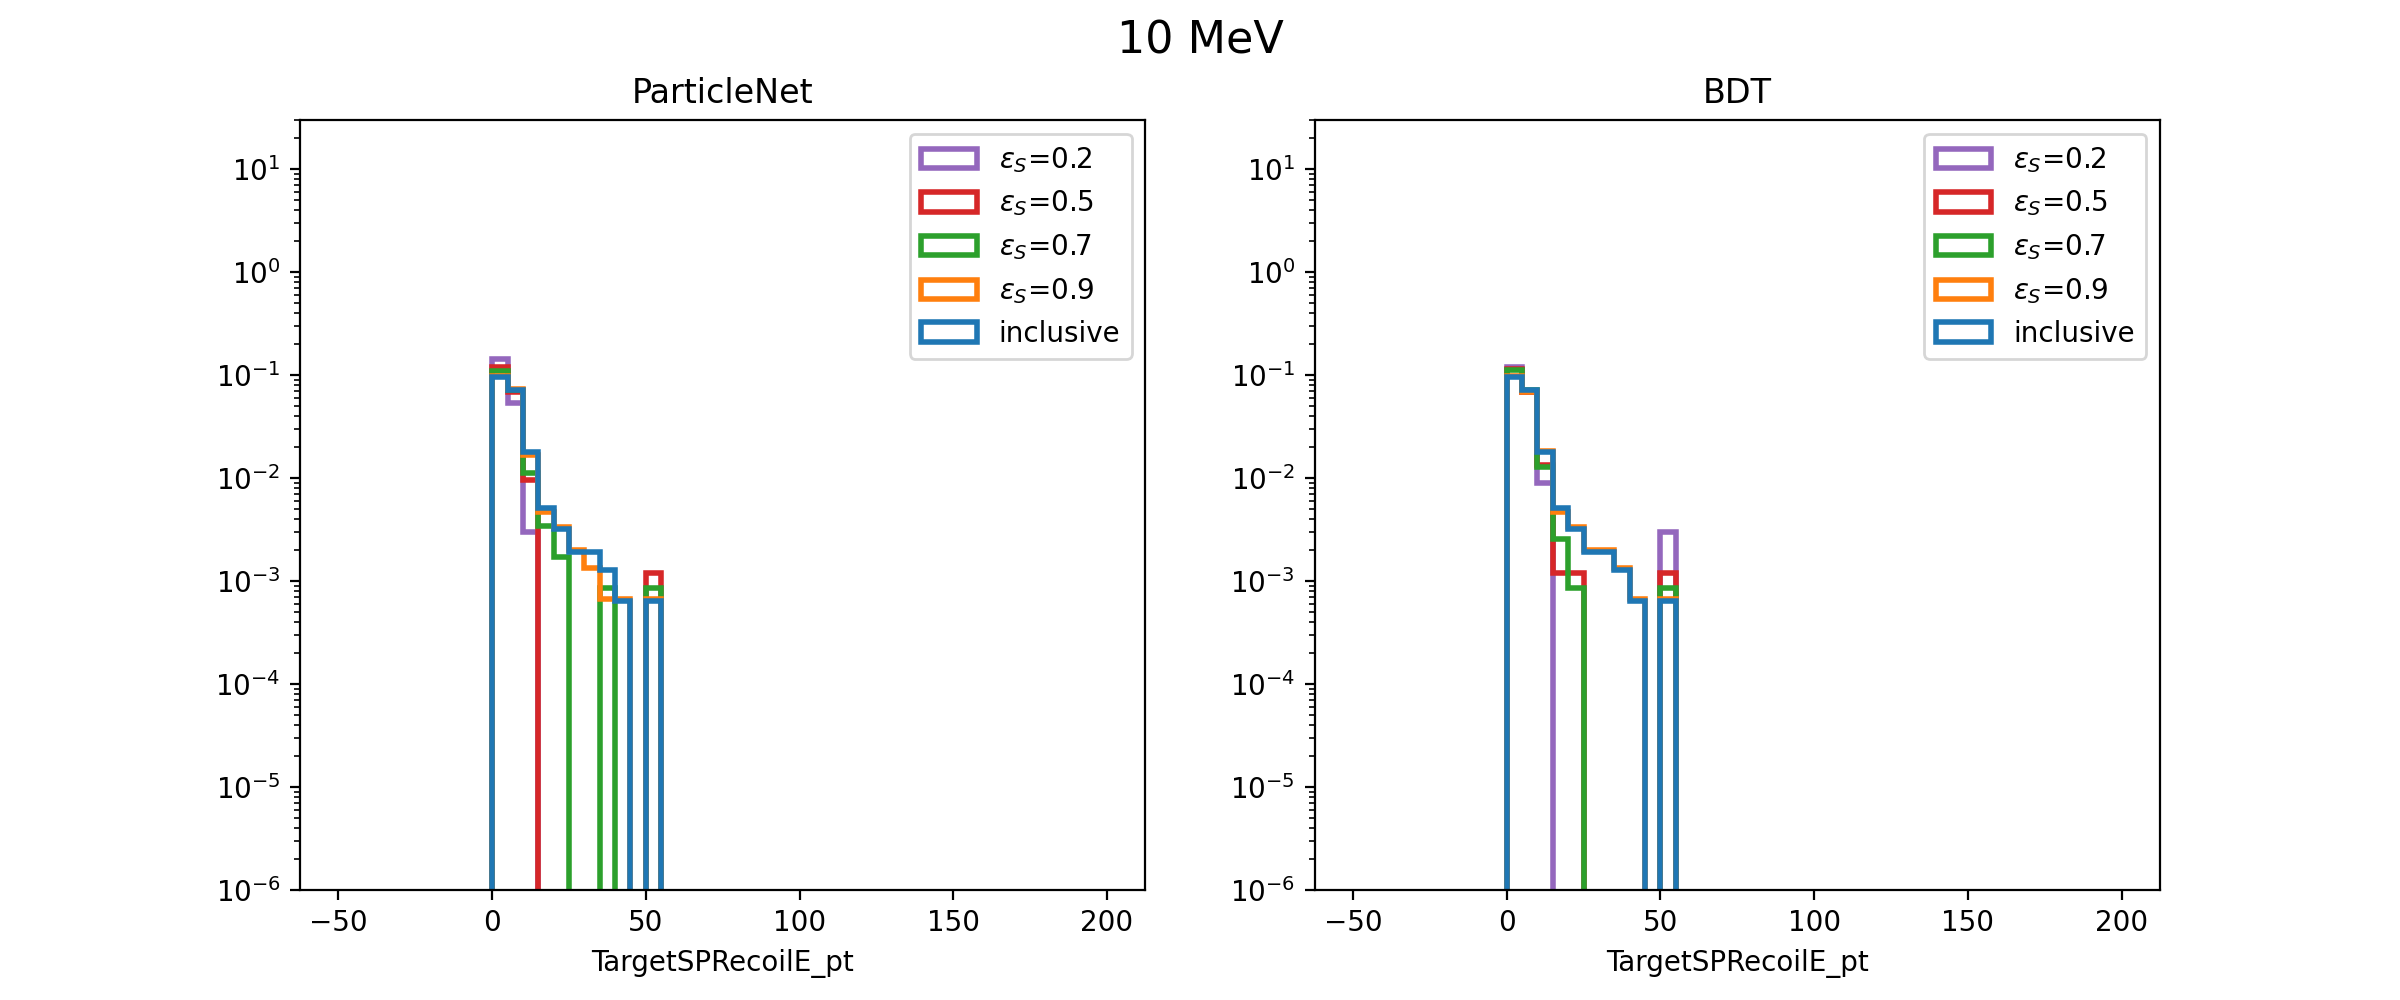

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.7544505467744678, 0.9221855740415221, 0.9661471747826526, 0.9991700015604829]
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0002905796658261482, 0.02514687685979969, 0.19436434494747326, 0.9828263912748941]


<IPython.core.display.Javascript object>


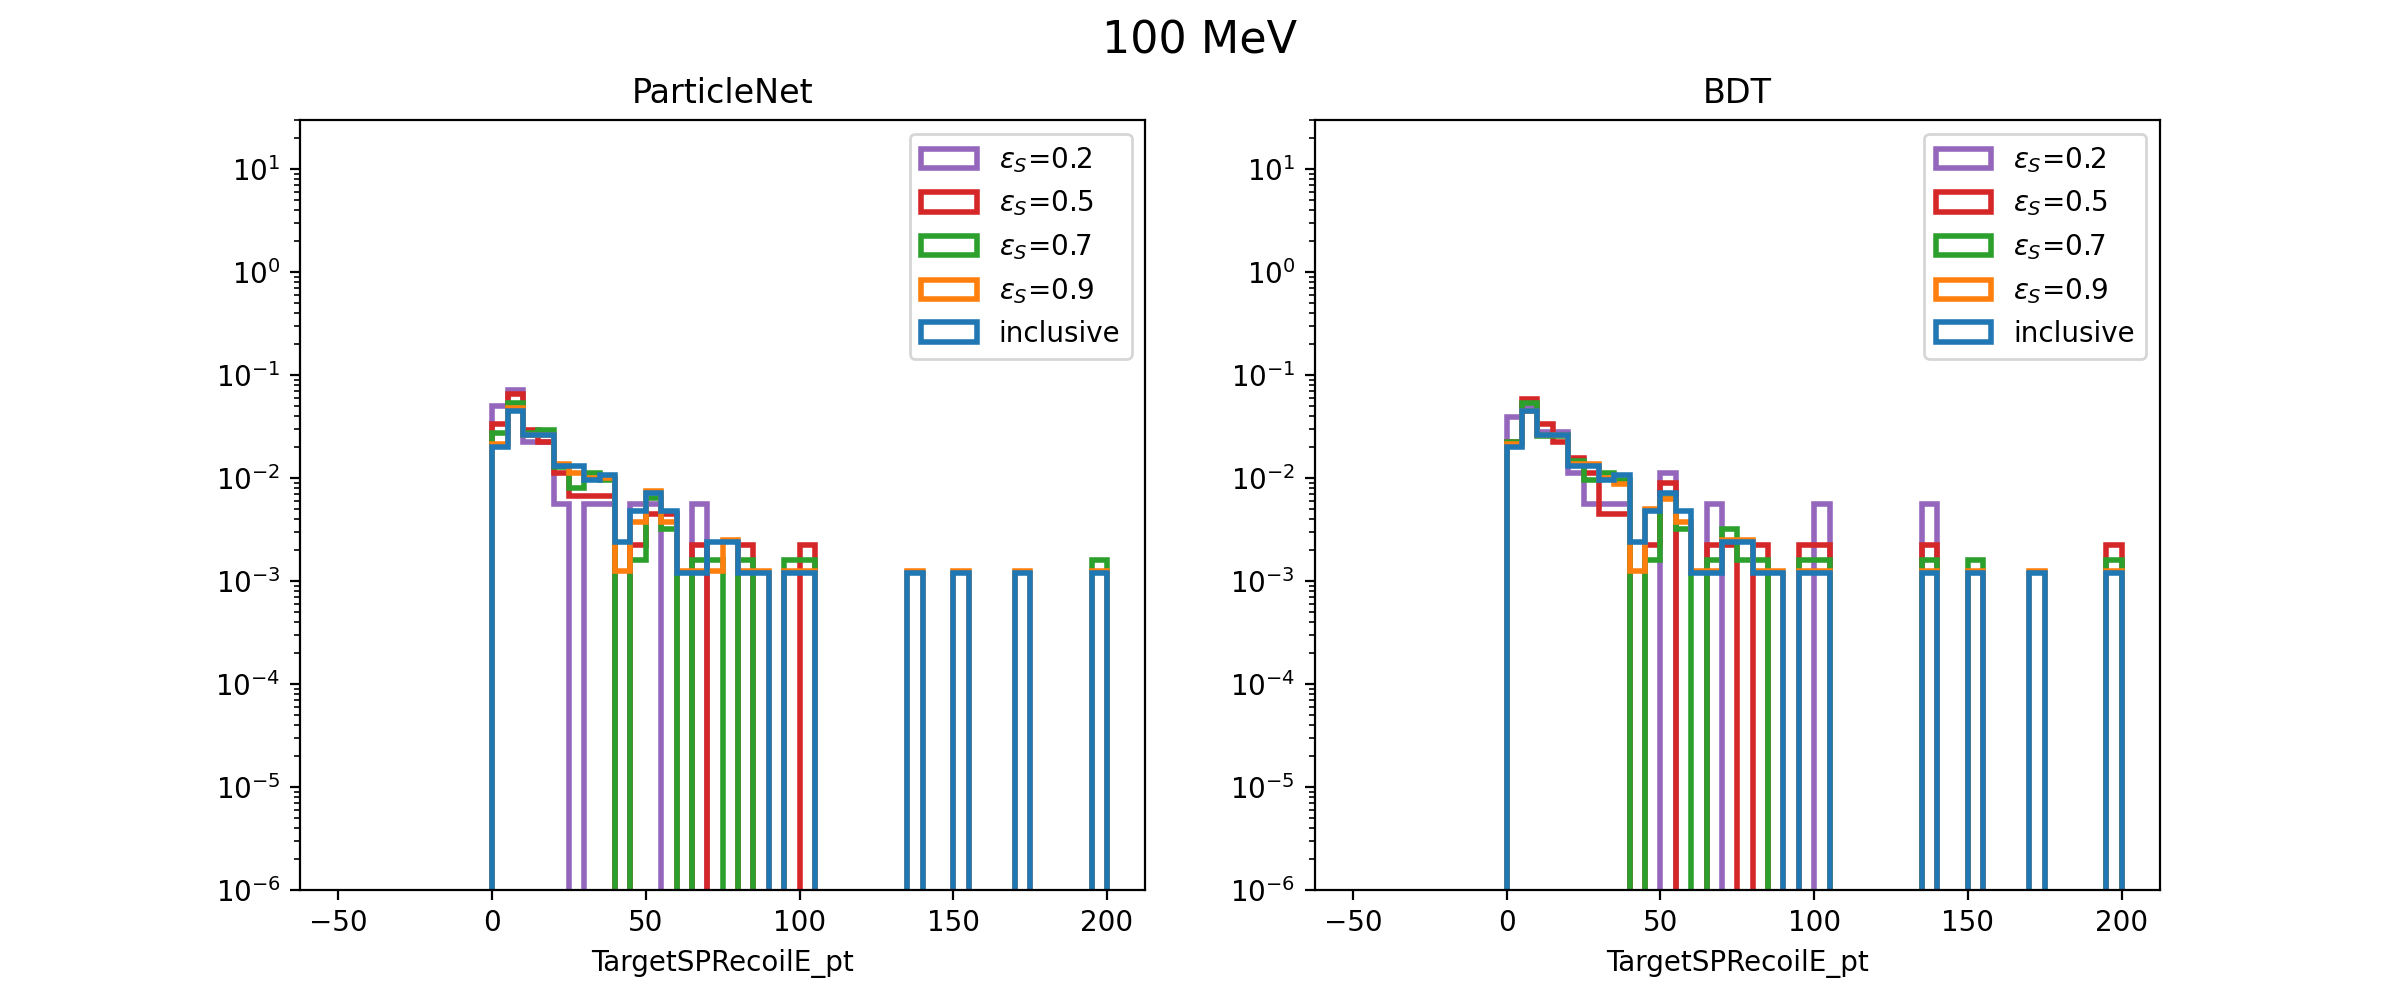

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.8081716316754866, 0.9503076497750546, 0.9907542676864972, 0.9998378814650867]
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0027436678719120386, 0.21004156777189026, 0.793856601653221, 0.982984920743289]


<IPython.core.display.Javascript object>


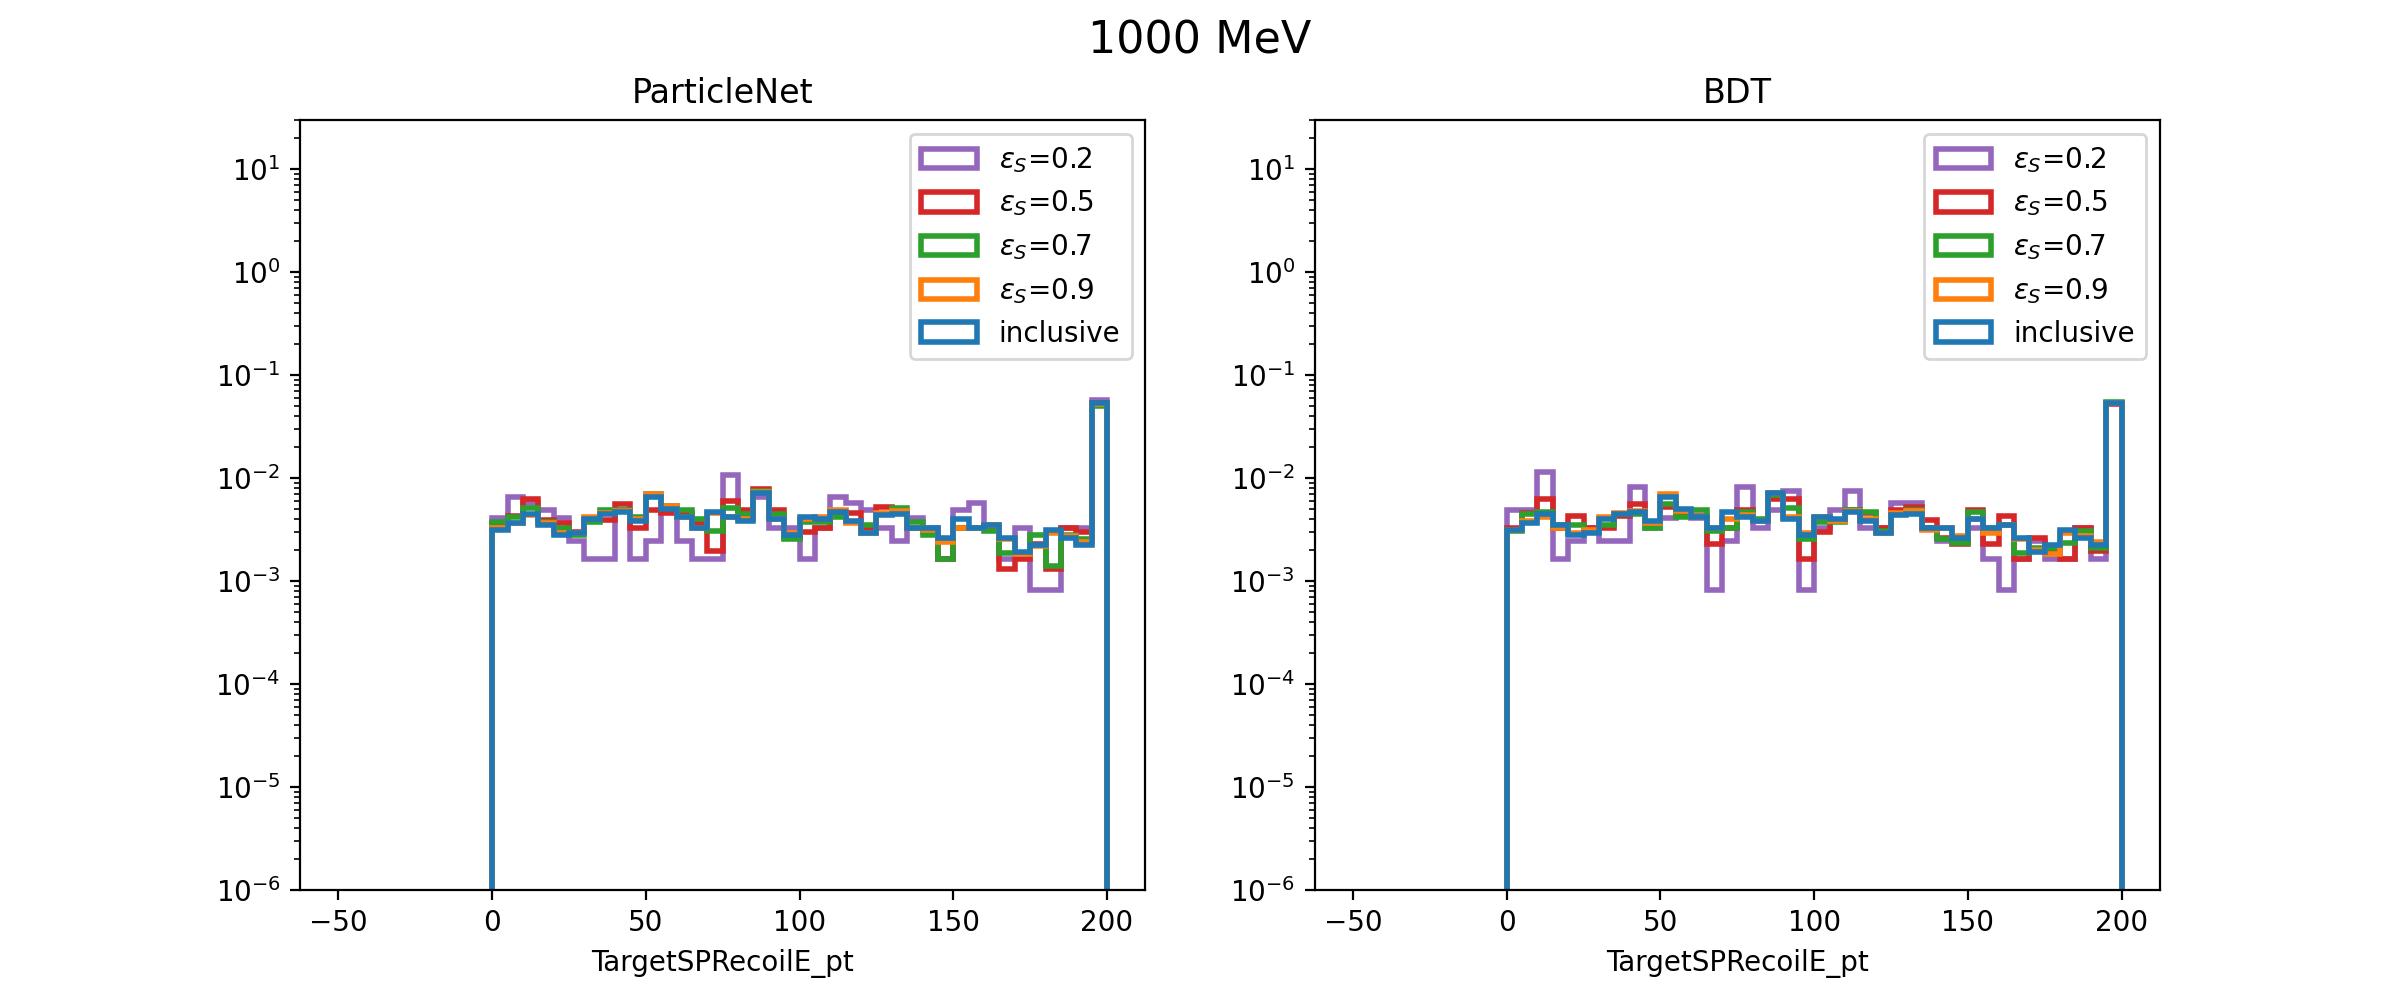

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.9216736278136147, 0.9965860161078454, 0.9996041003975111, 0.9999835464979085]
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.07122636758578947, 0.7297069435407252, 0.9576782696202195, 0.9975571518338109]


In [22]:
# compare shapes with succesively tighter selections
# keep BKG mistag rate the same for all signal points

for var in plot_bins:
    print(var)
    plot_trend(var, proc=0, mistag_levels=None)
    plot_trend(var, proc=1, mistag_levels=None)
    plot_trend(var, proc=10, mistag_levels=None)
    plot_trend(var, proc=100, mistag_levels=None)
    plot_trend(var, proc=1000, mistag_levels=None)

TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


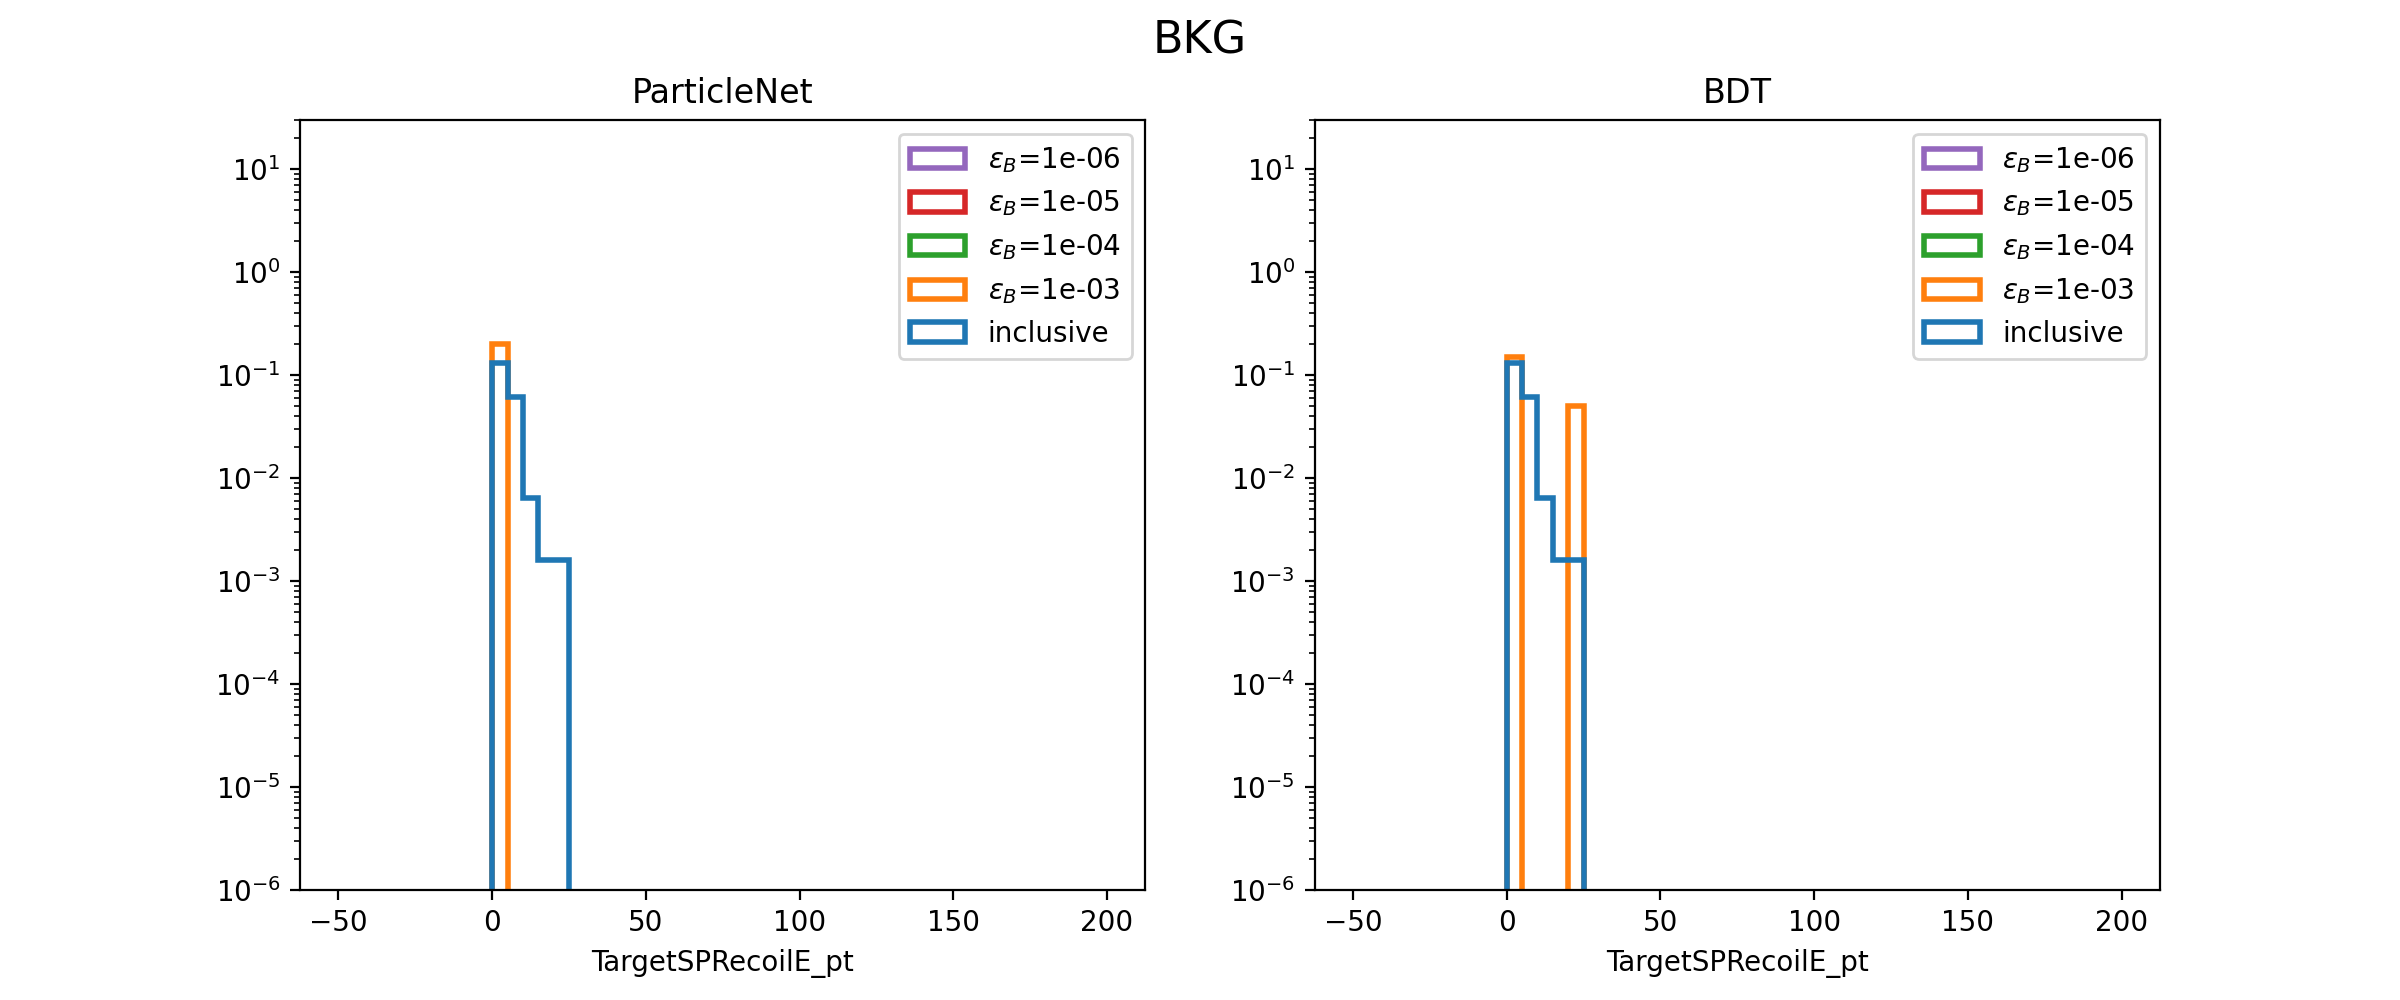

ParticleNet_disc [-99, 0.8581293996386049, 0.8942229346319648, 0.8942229346319648, 0.8942229346319648]
EcalVeto_v12.discValue_ [-99, 0.00849992, 0.07692963, 0.07692963, 0.07692963]


/home/dgj1118/miniconda3/envs/pytorch/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/dgj1118/miniconda3/envs/pytorch/lib/python3.7/site-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<IPython.core.display.Javascript object>


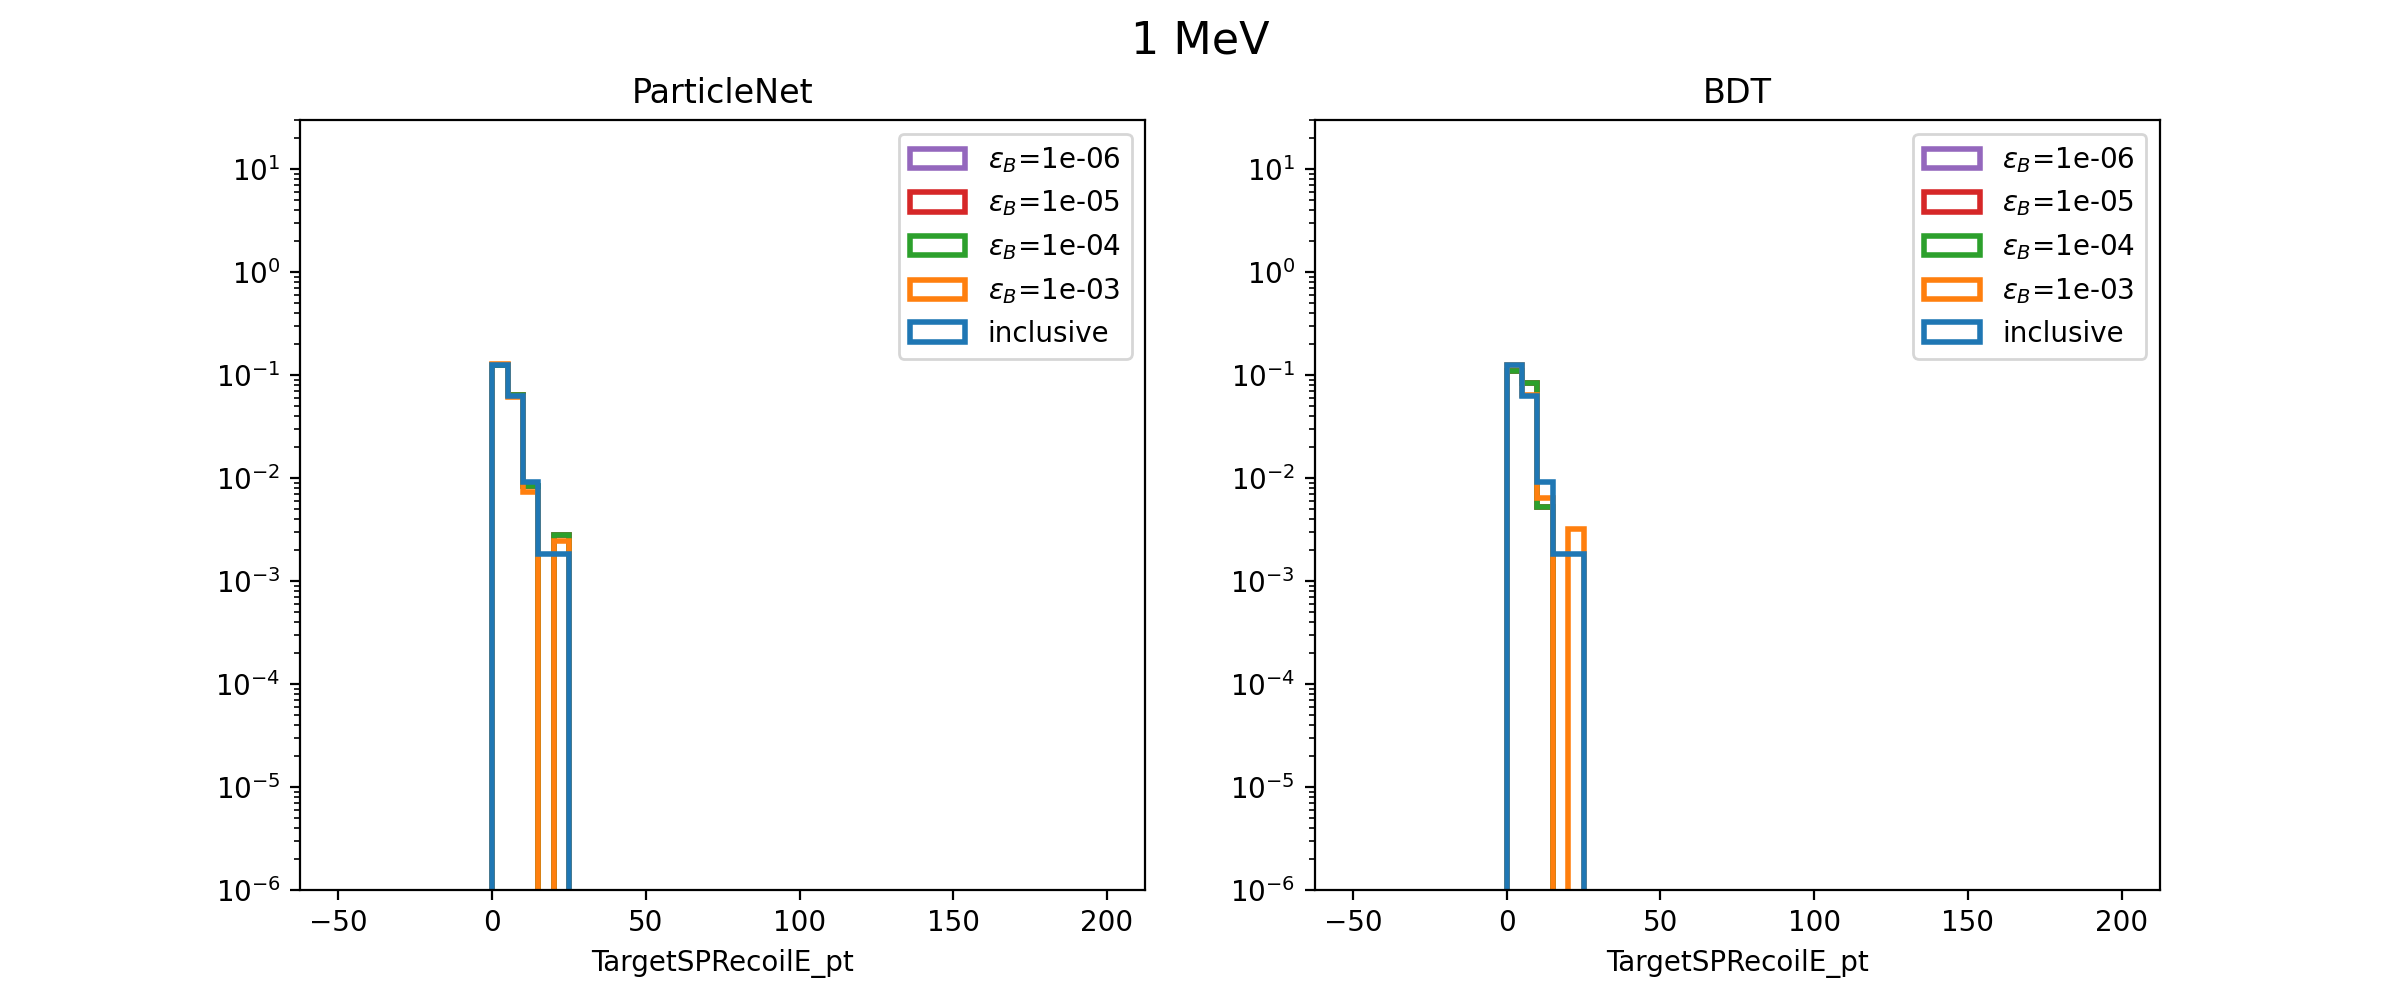

ParticleNet_disc [-99, 0.8581293996386049, 0.8942229346319648, 0.8942229346319648, 0.8942229346319648]
EcalVeto_v12.discValue_ [-99, 0.00849992, 0.07692963, 0.07692963, 0.07692963]


<IPython.core.display.Javascript object>


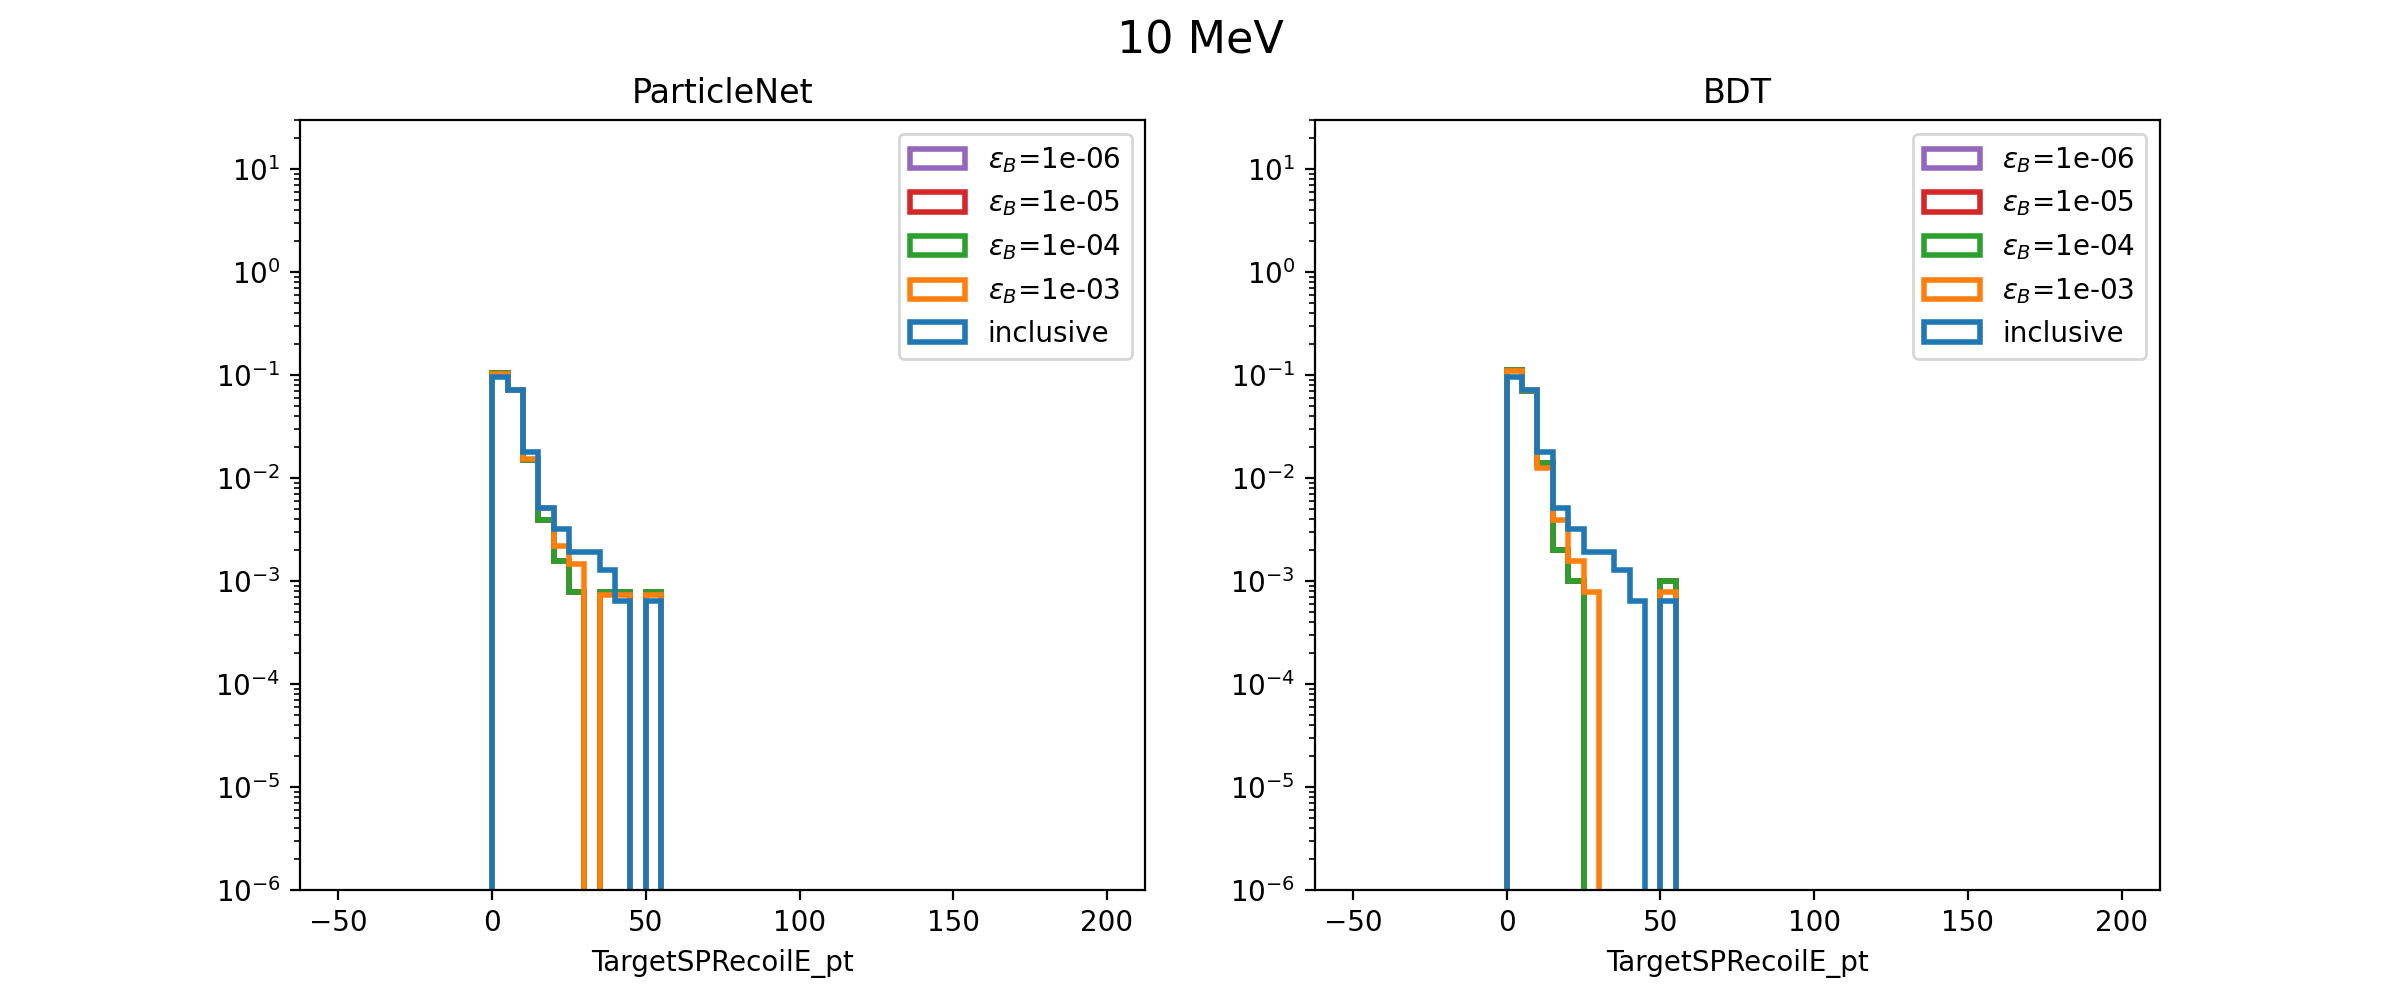

ParticleNet_disc [-99, 0.8581293996386049, 0.8942229346319648, 0.8942229346319648, 0.8942229346319648]
EcalVeto_v12.discValue_ [-99, 0.00849992, 0.07692963, 0.07692963, 0.07692963]


<IPython.core.display.Javascript object>


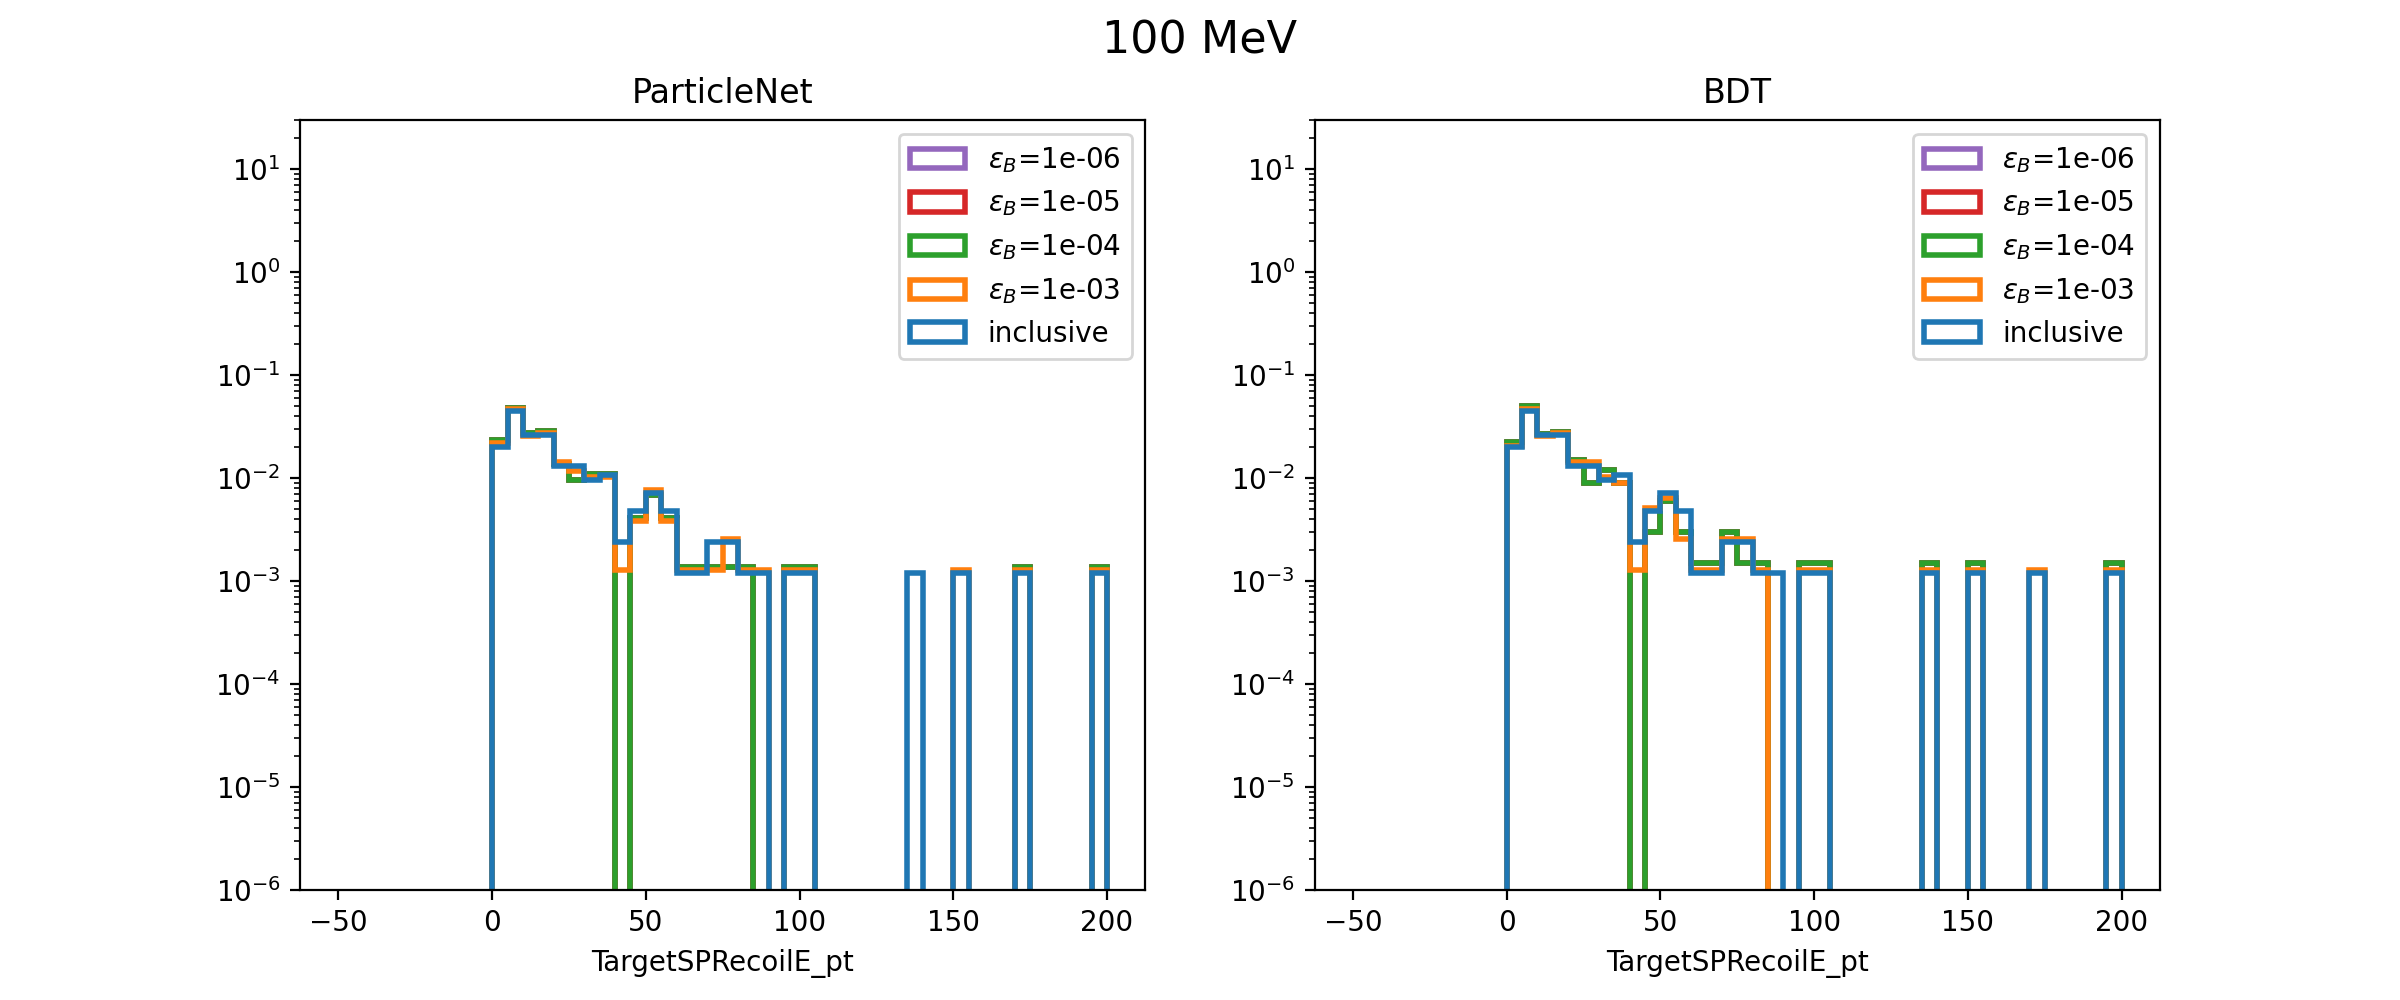

ParticleNet_disc [-99, 0.8581293996386049, 0.8942229346319648, 0.8942229346319648, 0.8942229346319648]
EcalVeto_v12.discValue_ [-99, 0.00849992, 0.07692963, 0.07692963, 0.07692963]


<IPython.core.display.Javascript object>


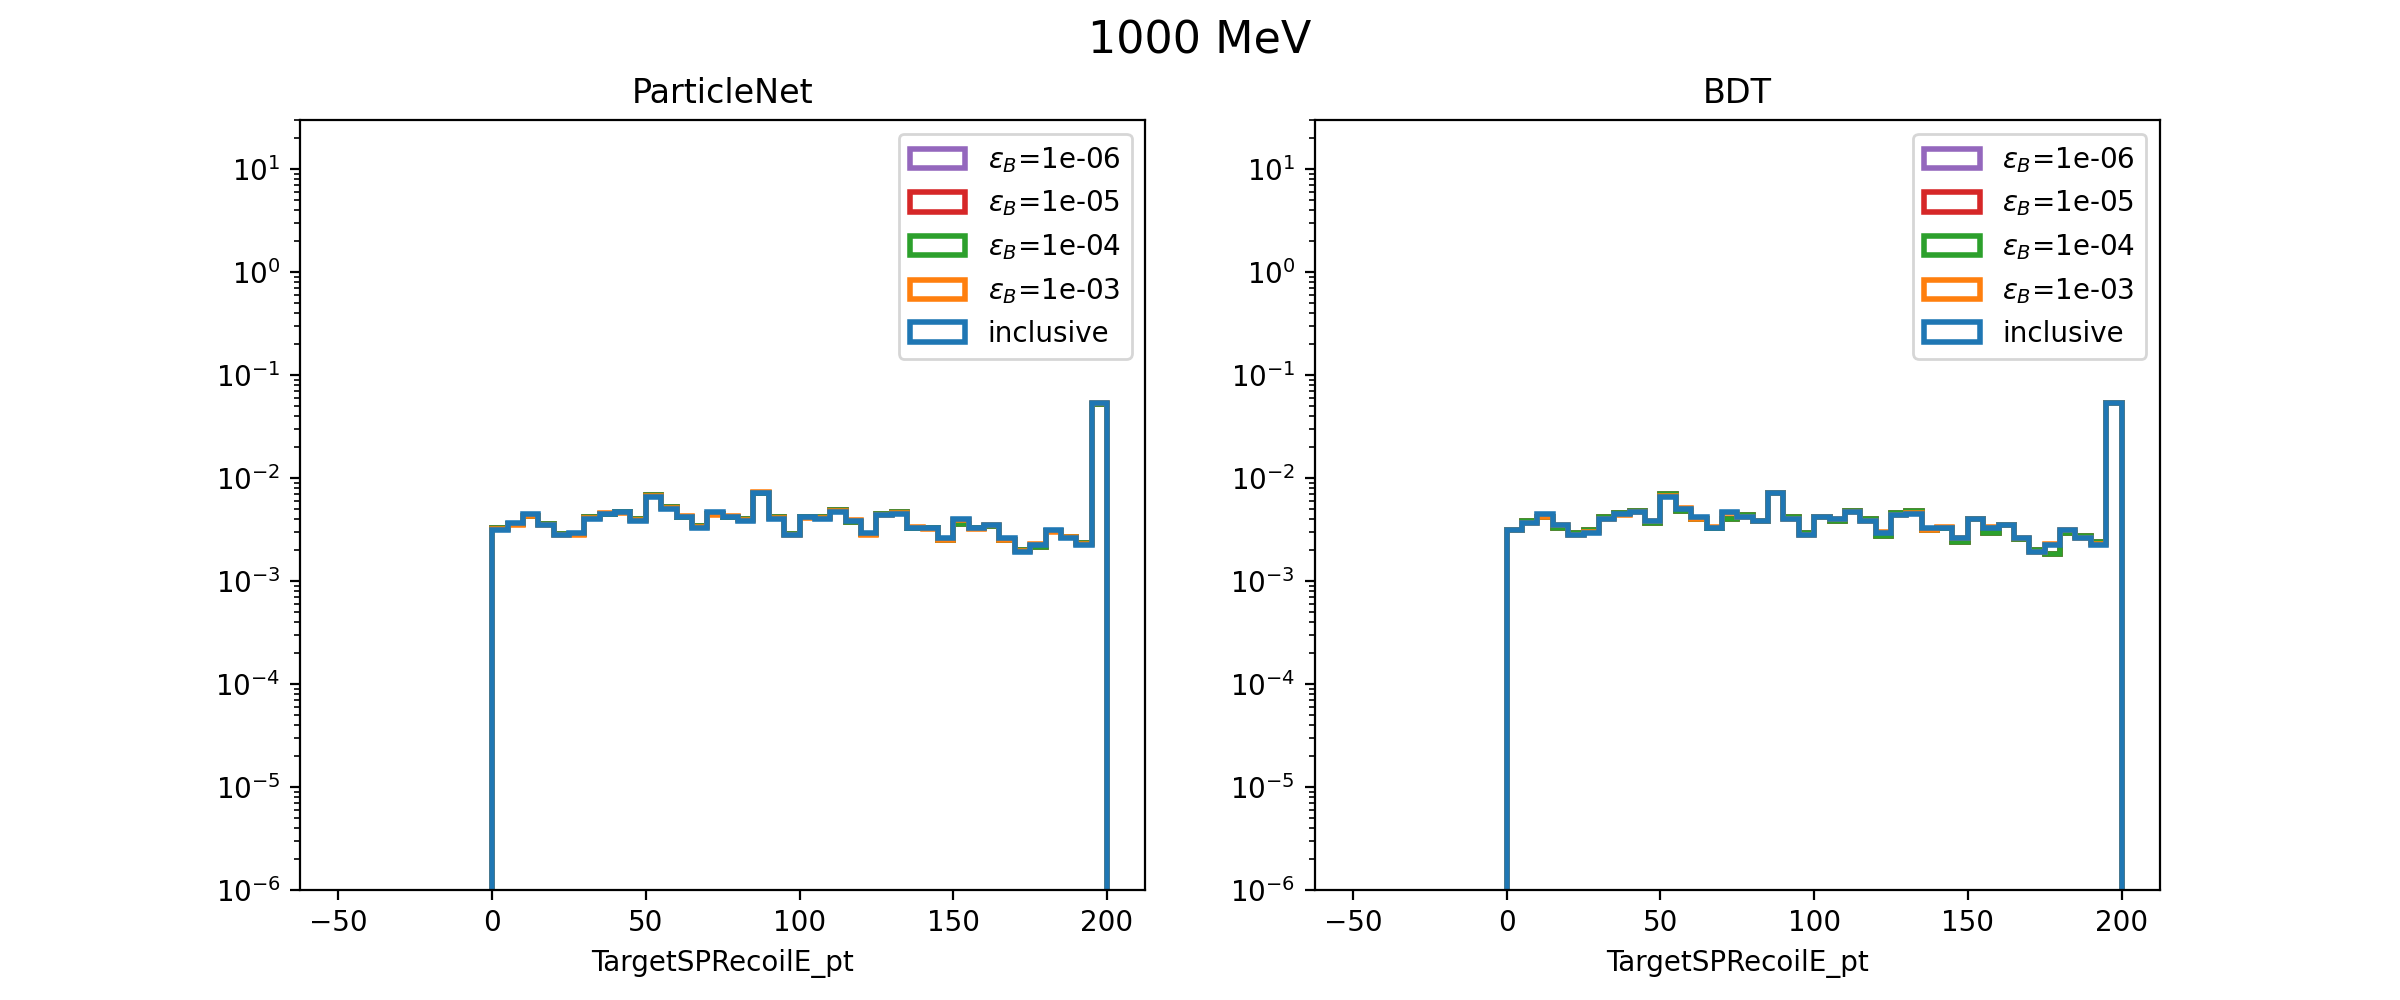

ParticleNet_disc [-99, 0.8581293996386049, 0.8942229346319648, 0.8942229346319648, 0.8942229346319648]
EcalVeto_v12.discValue_ [-99, 0.00849992, 0.07692963, 0.07692963, 0.07692963]


In [23]:
# compare shapes with succesively tighter selections
# keep SIG efficiency the same for all signal points

for var in plot_bins:
    print(var)
    plot_trend(var, proc=0)
    plot_trend(var, proc=1)
    plot_trend(var, proc=10)
    plot_trend(var, proc=100)
    plot_trend(var, proc=1000)
    
# All:  pT bias still visible in 10MeV
# SP hit:  pT bias mostly gone
# No SP hit:  no pT bias, as usual

In [24]:
# NEW RATIO PLOTS:
# Plot the above histogram results, except as fractions:  bin height / incl bin height for each efficiency.
colors_new = ['tab:purple', 'tab:red', 'tab:green', 'tab:orange']

def plot_trend_ratio(var_name, proc, eff_levels=None, mistag_levels=[1e-3, 1e-4, 1e-5, 1e-6]):
    if ':' in var_name:
        var, var_idx = var_name.split(':')
        var_idx = int(var_idx)
    else:
        var, var_idx = var_name, None
    if eff_levels is None and mistag_levels is None:
        eff_levels = [1e-3, 1e-4, 1e-5, 1e-6] if proc==0 else [0.9, 0.7, 0.5, 0.2]
    f, axes = plt.subplots(1, 2, figsize=(12, 2))
    #f.suptitle('%d MeV'%proc if proc>0 else 'BKG', fontsize=16)
    pos0 = test_extra_labels==proc
    #a_tmp = {k:a[k][pos0] for k in ('ParticleNet_disc', 'EcalVetoGabriel_recon.discValue_', var)}
    # TESTING CONVERSION:
    a_tmp = {k:np.array(a[k][pos0]) for k in ('ParticleNet_disc', 'EcalVeto_v12.discValue_', var)}
    if var_idx:
        a_tmp[var] = a_tmp[var][:, var_idx]
    # NEW:  Ratio plot testing
    ratio_arrs = []  # PN_disc, ECal.disc
    for i, k in enumerate(['ParticleNet_disc', 'EcalVeto_v12.discValue_']):
        arrs = []
        labels = []
        scores = a_tmp[k]
        if mistag_levels is None:  #NOTE:  Currently modifying this to produce fixed bkg efficiencies...
            #Changing presel_eff[proc] to 1 (Warning:  bkg will be messed up)
            pcts = (1 - np.array(eff_levels)/presel_eff[1]) * 100.
            print('effs=', pcts)
            thresholds = [-99] + list(np.percentile(scores, pcts))
        else:
            thresholds = [-99] + [info[-1] for info in roc_info[1]['SplitNet' if i==0 else 'BDT']]
        print(k, thresholds)
        # NEW:  Ratio plot
        for idx, thres in enumerate(thresholds):
            pos = scores>thres
#             print(k, thres, pos.sum())
            if not isinstance(plot_bins[var_name], int):
                arrs.append(np.clip(a_tmp[var][pos], min(plot_bins[var_name]), max(plot_bins[var_name])))
            else:
                arrs.append(a_tmp[var][pos])
            if mistag_levels is None:
                labels.append('inclusive' if idx==0 else ('$\epsilon_{B}$=%.0e'%eff_levels[idx-1] if proc==0 else '$\epsilon_{S}$=%.1f'%eff_levels[idx-1]))
            else:
                labels.append('inclusive' if idx==0 else '$\epsilon_{B}$=%.0e'%mistag_levels[idx-1])
        
        inclusive_index = labels.index('inclusive')
        inclusive_arr = arrs[inclusive_index]
        inclusive_hist,     edges = np.histogram(inclusive_arr, bins=plot_bins[var_name], density=True)
        inclusive_num_hist, edges = np.histogram(inclusive_arr, bins=plot_bins[var_name])
        inclusive_frac_errs = [1/np.sqrt(n) for n in inclusive_num_hist]
        new_labels = []
        ratio_arrs = []
        plt_edges = []
        yerrs = []
        print("inclusive hist shape is", inclusive_hist.shape)
        for l, arr in zip(labels, arrs):
            if l =='inclusive':  continue
            new_hist, edges     = np.histogram(arr, bins=plot_bins[var_name], density=True)
            new_num_hist, edges = np.histogram(arr, bins=plot_bins[var_name])
            bin_errs = [1/np.sqrt(n) for n in new_num_hist]
            ratio_arr = [new_hist[j] / inclusive_hist[j] for j in range(len(new_hist))]  #new_hist / inclusive_hist  # Should perform element-wise division
            frac_errs = [np.sqrt(bin_errs[n]**2 + inclusive_frac_errs[n]**2) for n in range(len(bin_errs))]
            #print("New ratio_arr shape is", ratio_arr.shape)
            #print("Edges shape is", edges.shape)
            #print("PLOTTING ARRAYS:", l)
            #print("baseline:")
            #print(inclusive_hist)
            #print("other:")
            #print(new_hist)
            #print("Ratio plot:")
            for r in range(len(ratio_arr)):
                if np.isnan(ratio_arr[r]):  ratio_arr[r] = 0
            #print(ratio_arr)
            ratio_arrs.append(ratio_arr)
            yerrs.append(frac_errs)
            plt_edges.append(edges[:-1])
            new_labels.append(l)
        
        # NEW:
        #histo_list = []
        #for arr in arrs:
        #    histo = np.histogram(arr, bins=plot_bins[var_name], density=True)
        #print(plt_edges[0], ratio_arrs[0])
        #print(new_labels, colors[:-1])
        for j in range(len(ratio_arrs)):
            axes[i].errorbar(plt_edges[j], ratio_arrs[j], yerr=yerrs[j], fmt='o', label=new_labels[j], color=colors_new[j], linewidth=2)
        #axes[i].set_title('ParticleNet' if i==0 else 'BDT')  #, '+str(proc if proc>0 else 'BKG')+' MeV
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("events / inclusive")
        axes[i].set_ylim(0, 3)
        axes[i].legend(loc='best')
        

SIG EFFICIENCY PLOTS:
TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


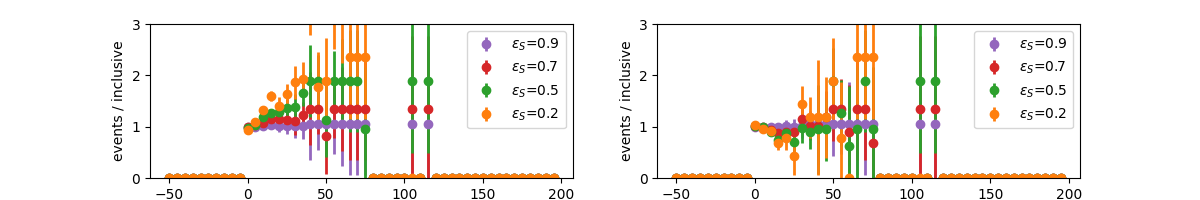

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.7612896710681897, 0.897937750987537, 0.9411292219364841, 0.9875114636459427]
inclusive hist shape is (50,)
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0002581258192948317, 0.001919865608215332, 0.010672411409533233, 0.3003731317783119]
inclusive hist shape is (50,)


/home/pmasterson/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in double_scalars
/home/pmasterson/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in double_scalars
/home/pmasterson/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


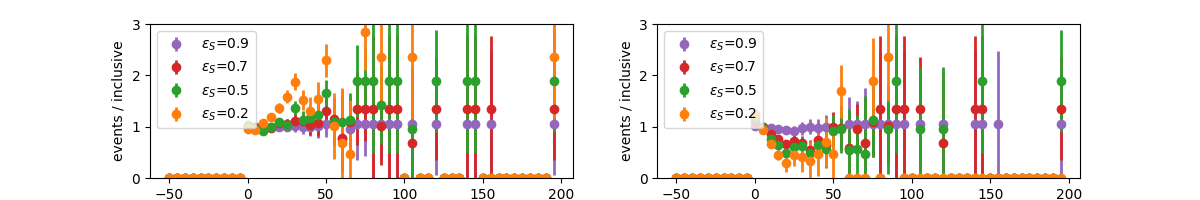

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.7910726251238112, 0.9124389956143403, 0.9493838585166979, 0.9835808454825299]
inclusive hist shape is (50,)
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0005118080131517318, 0.012401985427076516, 0.11410128375227149, 0.8848005792513992]
inclusive hist shape is (50,)


<IPython.core.display.Javascript object>


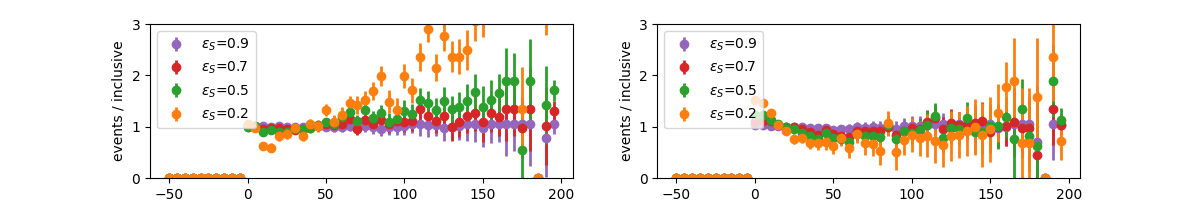

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.8352170719465422, 0.9449039727038915, 0.9726953942372802, 0.9922988114216069]
inclusive hist shape is (50,)
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.0013098413658930302, 0.046175271510921025, 0.32883814338499273, 0.9522553089943016]
inclusive hist shape is (50,)


<IPython.core.display.Javascript object>


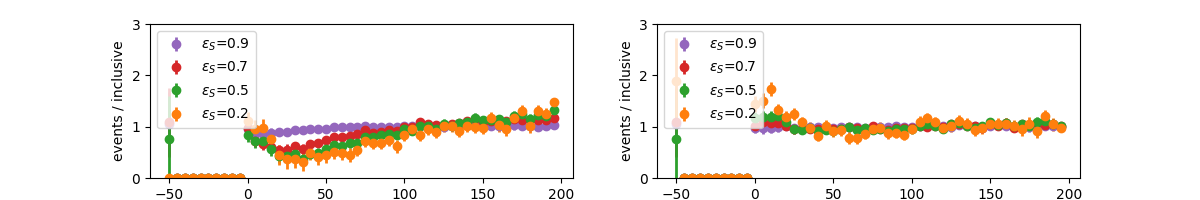

effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
ParticleNet_disc [-99, 0.9522528976802893, 0.9933475807320844, 0.9980672153470492, 0.9996894362883428]
inclusive hist shape is (50,)
effs= [ 4.89188718 26.02702336 47.16215955 78.86486382]
EcalVeto_v12.discValue_ [-99, 0.018499337684776084, 0.3370660931820976, 0.7842501608554294, 0.9883023998475143]
inclusive hist shape is (50,)
BKG EFFICIENCY PLOTS:
TargetSPRecoilE_pt


<IPython.core.display.Javascript object>


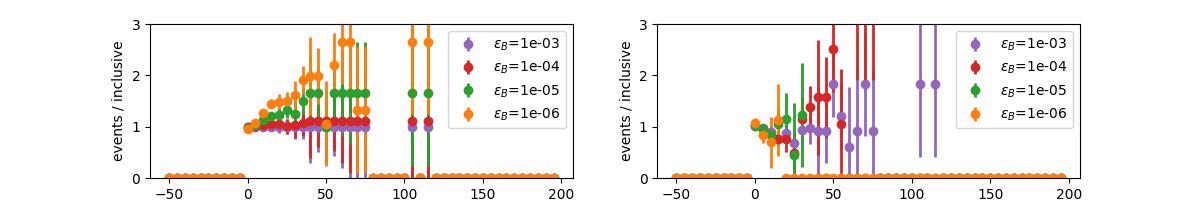

ParticleNet_disc [-99, 0.3931954226565697, 0.8189546184351203, 0.9276733200408149, 0.9661693053155552]
inclusive hist shape is (50,)
EcalVeto_v12.discValue_ [-99, 0.009112954, 0.53481126, 0.9936358, 0.9995252]
inclusive hist shape is (50,)


/home/pmasterson/miniconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


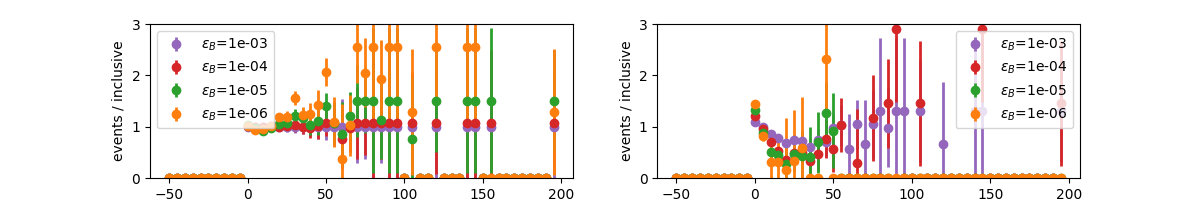

ParticleNet_disc [-99, 0.3931954226565697, 0.8189546184351203, 0.9276733200408149, 0.9661693053155552]
inclusive hist shape is (50,)
EcalVeto_v12.discValue_ [-99, 0.009112954, 0.53481126, 0.9936358, 0.9995252]
inclusive hist shape is (50,)


<IPython.core.display.Javascript object>


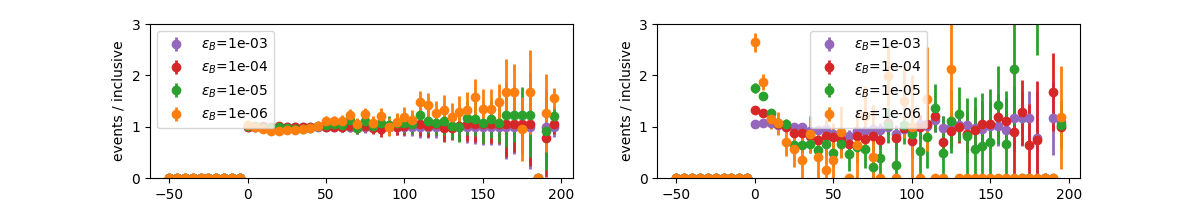

ParticleNet_disc [-99, 0.3931954226565697, 0.8189546184351203, 0.9276733200408149, 0.9661693053155552]
inclusive hist shape is (50,)
EcalVeto_v12.discValue_ [-99, 0.009112954, 0.53481126, 0.9936358, 0.9995252]
inclusive hist shape is (50,)


<IPython.core.display.Javascript object>


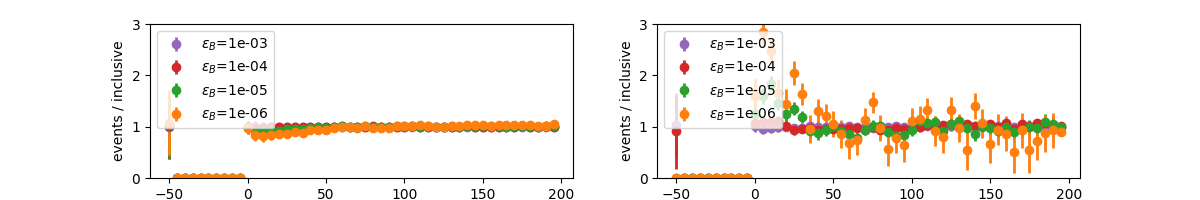

ParticleNet_disc [-99, 0.3931954226565697, 0.8189546184351203, 0.9276733200408149, 0.9661693053155552]
inclusive hist shape is (50,)
EcalVeto_v12.discValue_ [-99, 0.009112954, 0.53481126, 0.9936358, 0.9995252]
inclusive hist shape is (50,)


In [57]:
print("SIG EFFICIENCY PLOTS:")

for var in plot_bins:
    print(var)
    #plot_trend_ratio(var, proc=0, mistag_levels=None)
    plot_trend_ratio(var, proc=1, mistag_levels=None)
    plot_trend_ratio(var, proc=10, mistag_levels=None)
    plot_trend_ratio(var, proc=100, mistag_levels=None)
    plot_trend_ratio(var, proc=1000, mistag_levels=None)

print("BKG EFFICIENCY PLOTS:")

for var in plot_bins:
    print(var)
    #plot_trend_ratio(var, proc=0)
    plot_trend_ratio(var, proc=1)
    plot_trend_ratio(var, proc=10)
    plot_trend_ratio(var, proc=100)
    plot_trend_ratio(var, proc=1000)